### Pandas

###### Object creation in Pandas

In [1]:
import numpy as np
import pandas as pd

In [2]:
pd.__version__

'1.1.1'

Creating a Series by passing a list of values, letting pandas create a default integer index:

In [3]:
pd.Series([1, 3, 5, np.nan, 6, 8])

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Creating a DataFrame by passing a NumPy array, with a datetime index and labeled columns:

In [4]:
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [5]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,-0.328122,0.033300,-0.723247,1.028527
2013-01-02,1.524499,-0.496502,0.499513,-1.876686
2013-01-03,0.313439,-1.268705,0.137832,-0.205362
2013-01-04,0.922222,-0.474434,-0.930855,0.977667
2013-01-05,1.226609,0.165642,-0.483290,-0.344484
2013-01-06,0.711350,-0.787785,2.511936,1.013199


Creating a DataFrame by passing a dict of objects that can be converted to series-like.

In [6]:
df2 = pd.DataFrame({'A': 1.,
                    'B': pd.Timestamp('20130102'),
                    'C': pd.Series(1, index=list(range(4)), dtype='float32'),
                    'D': np.array([3] * 4, dtype='int32'),
                    'E': pd.Categorical(["test", "train", "test", "train"]),
                    'F': 'foo'})

df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


The columns of the resulting DataFrame have different dtypes.

In [7]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

If you’re using IPython, tab completion for column names (as well as public attributes) is automatically enabled. Here’s a subset of the attributes that will be completed:

As you can see, the columns A, B, C, and D are automatically tab completed. E and F are there as well; the rest of the attributes have been truncated for brevity.

###### Viewing data

In [8]:
df2.head()

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [9]:
df2.tail()

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [10]:
df2.index

Int64Index([0, 1, 2, 3], dtype='int64')

In [11]:
df2.columns

Index(['A', 'B', 'C', 'D', 'E', 'F'], dtype='object')

DataFrame.to_numpy() gives a NumPy representation of the underlying data. Note that this can be an expensive operation when your DataFrame has columns with different data types, which comes down to a fundamental difference between pandas and NumPy: NumPy arrays have one dtype for the entire array, while pandas DataFrames have one dtype per column. When you call DataFrame.to_numpy(), pandas will find the NumPy dtype that can hold all of the dtypes in the DataFrame. This may end up being object, which requires casting every value to a Python object.

In [12]:
df2.to_numpy()

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

For df, our DataFrame of all floating-point values, DataFrame.to_numpy() is fast and doesn’t require copying data.

In [13]:
df.to_numpy()

array([[-0.32812209,  0.03329978, -0.72324668,  1.02852693],
       [ 1.52449898, -0.4965023 ,  0.49951254, -1.87668575],
       [ 0.31343932, -1.26870497,  0.13783206, -0.20536159],
       [ 0.92222162, -0.47443397, -0.93085529,  0.97766652],
       [ 1.22660859,  0.16564248, -0.48329005, -0.34448439],
       [ 0.71134955, -0.78778458,  2.51193616,  1.01319851]])

describe() shows a quick statistic summary of your data:

In [14]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.728333,-0.471414,0.168648,0.098810
std,0.664571,0.528579,1.267346,1.154511
min,-0.328122,-1.268705,-0.930855,-1.876686
25%,0.412917,-0.714964,-0.663258,-0.309704
50%,0.816786,-0.485468,-0.172729,0.386152
75%,1.150512,-0.093634,0.409092,1.004316
max,1.524499,0.165642,2.511936,1.028527


In [15]:
df2.describe()

,A,C,D
count,4.0,4.0,4.0
mean,1.0,1.0,3.0
std,0.0,0.0,0.0
min,1.0,1.0,3.0
25%,1.0,1.0,3.0
50%,1.0,1.0,3.0
75%,1.0,1.0,3.0
max,1.0,1.0,3.0


Transposing your data:

In [16]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,-0.328122,1.524499,0.313439,0.922222,1.226609,0.711350
B,0.033300,-0.496502,-1.268705,-0.474434,0.165642,-0.787785
C,-0.723247,0.499513,0.137832,-0.930855,-0.483290,2.511936
D,1.028527,-1.876686,-0.205362,0.977667,-0.344484,1.013199


Sorting by an axis:

In [17]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,1.028527,-0.723247,0.033300,-0.328122
2013-01-02,-1.876686,0.499513,-0.496502,1.524499
2013-01-03,-0.205362,0.137832,-1.268705,0.313439
2013-01-04,0.977667,-0.930855,-0.474434,0.922222
2013-01-05,-0.344484,-0.483290,0.165642,1.226609
2013-01-06,1.013199,2.511936,-0.787785,0.711350


Sorting by values:

In [18]:
df2.sort_values(by='B')

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


###### Selection by label

In [19]:
df2['A']

0    1.0
1    1.0
2    1.0
3    1.0
Name: A, dtype: float64

In [20]:
df2[0:3]

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo


In [21]:
df2.loc[0]

A                      1
B    2013-01-02 00:00:00
C                      1
D                      3
E                   test
F                    foo
Name: 0, dtype: object

In [22]:
df2.loc[:, ['A', 'B']]

,A,B
0,1.0,2013-01-02
1,1.0,2013-01-02
2,1.0,2013-01-02
3,1.0,2013-01-02


In [23]:
df2.loc[0:4, ['A', 'B']]

,A,B
0,1.0,2013-01-02
1,1.0,2013-01-02
2,1.0,2013-01-02
3,1.0,2013-01-02


In [24]:
df2.loc[0, 'A']

1.0

In [25]:
df2.at[0, 'A']

1.0

###### Selection by position

In [26]:
df2.iloc[3]

A                      1
B    2013-01-02 00:00:00
C                      1
D                      3
E                  train
F                    foo
Name: 3, dtype: object

In [27]:
df2.iloc[3:5, 0:2]

,A,B
3,1.0,2013-01-02


In [28]:
df2.iloc[[1, 2], [0, 2]]

,A,C
1,1.0,1.0
2,1.0,1.0


In [29]:
df2.iloc[1:3, :]

,A,B,C,D,E,F
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo


In [30]:
df2.iloc[:, 1:3]

,B,C
0,2013-01-02,1.0
1,2013-01-02,1.0
2,2013-01-02,1.0
3,2013-01-02,1.0


In [31]:
df2.iloc[1, 1]

Timestamp('2013-01-02 00:00:00')

In [32]:
df2.iat[1, 1]

Timestamp('2013-01-02 00:00:00')

##### Boolean indexing

Using a single column’s values to select data.

In [33]:
df2[df2['A'] > 0]

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [34]:
df2[df2['C'] > 0]

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


Using the isin() method for filtering:

In [35]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))

In [36]:
df2 = df.copy()

In [37]:
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']
df2

,A,B,C,D,E
2013-01-01,-1.356618,-0.351453,-0.002043,-1.908225,one
2013-01-02,0.809606,0.679651,-0.452900,1.109004,one
2013-01-03,0.263057,0.608885,1.456551,-0.376744,two
2013-01-04,0.081717,-0.082764,-0.765552,1.017175,three
2013-01-05,1.490305,0.827514,0.112875,-0.081343,four
2013-01-06,-0.478771,1.211867,-1.642044,1.213072,three


In [38]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2013-01-03,0.263057,0.608885,1.456551,-0.376744,two
2013-01-05,1.490305,0.827514,0.112875,-0.081343,four


##### Setting

Setting a new column automatically aligns the data by the indexes.

In [39]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range('20130102', periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

Setting values by label:

In [40]:
df.at[dates[0], 'A'] = 0

In [41]:
df.iat[0, 1] = 0

In [42]:
df.loc[:, 'D'] = np.array([5] * len(df))

In [43]:
df

,A,B,C,D
2013-01-01,0.000000,0.000000,-0.002043,5
2013-01-02,0.809606,0.679651,-0.452900,5
2013-01-03,0.263057,0.608885,1.456551,5
2013-01-04,0.081717,-0.082764,-0.765552,5
2013-01-05,1.490305,0.827514,0.112875,5
2013-01-06,-0.478771,1.211867,-1.642044,5


A where operation with setting.

In [44]:
df2 = df.copy()

In [45]:
df2[df2>0] = -df2

In [46]:
df2

,A,B,C,D
2013-01-01,0.000000,0.000000,-0.002043,-5
2013-01-02,-0.809606,-0.679651,-0.452900,-5
2013-01-03,-0.263057,-0.608885,-1.456551,-5
2013-01-04,-0.081717,-0.082764,-0.765552,-5
2013-01-05,-1.490305,-0.827514,-0.112875,-5
2013-01-06,-0.478771,-1.211867,-1.642044,-5


###### Missing data

pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations. 

Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data.

In [47]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])

In [48]:
df1.loc[dates[0]:dates[1], 'E'] = 1

In [49]:
df1

,A,B,C,D,E
2013-01-01,0.000000,0.000000,-0.002043,5,1.0
2013-01-02,0.809606,0.679651,-0.452900,5,1.0
2013-01-03,0.263057,0.608885,1.456551,5,NaN
2013-01-04,0.081717,-0.082764,-0.765552,5,NaN


In [50]:
df1.dropna(how='any')

,A,B,C,D,E
2013-01-01,0.000000,0.000000,-0.002043,5,1.0
2013-01-02,0.809606,0.679651,-0.452900,5,1.0


In [51]:
df1.fillna(value=5)

,A,B,C,D,E
2013-01-01,0.000000,0.000000,-0.002043,5,1.0
2013-01-02,0.809606,0.679651,-0.452900,5,1.0
2013-01-03,0.263057,0.608885,1.456551,5,5.0
2013-01-04,0.081717,-0.082764,-0.765552,5,5.0


To get the boolean mask where values are nan.

In [52]:
pd.isna(df1)

,A,B,C,D,E
2013-01-01,False,False,False,False,False
2013-01-02,False,False,False,False,False
2013-01-03,False,False,False,False,True
2013-01-04,False,False,False,False,True


In [53]:
df1.isna()

,A,B,C,D,E
2013-01-01,False,False,False,False,False
2013-01-02,False,False,False,False,False
2013-01-03,False,False,False,False,True
2013-01-04,False,False,False,False,True


###### Operations

In [54]:
df.mean()

A    0.360986
B    0.540859
C   -0.215519
D    5.000000
dtype: float64

In [55]:
df.mean(1)

2013-01-01    1.249489
2013-01-02    1.509089
2013-01-03    1.832123
2013-01-04    1.058350
2013-01-05    1.857674
2013-01-06    1.022763
Freq: D, dtype: float64

Operating with objects that have different dimensionality and need alignment. In addition, pandas automatically broadcasts along the specified dimension.

In [56]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)

In [57]:
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [58]:
df.sub(s, axis='index')

,A,B,C,D
2013-01-01,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN
2013-01-03,-0.736943,-0.391115,0.456551,4.0
2013-01-04,-2.918283,-3.082764,-3.765552,2.0
2013-01-05,-3.509695,-4.172486,-4.887125,0.0
2013-01-06,NaN,NaN,NaN,NaN


###### Apply

In [59]:
df.apply(np.cumsum)

,A,B,C,D
2013-01-01,0.000000,0.000000,-0.002043,5
2013-01-02,0.809606,0.679651,-0.454943,10
2013-01-03,1.072664,1.288535,1.001608,15
2013-01-04,1.154381,1.205771,0.236056,20
2013-01-05,2.644686,2.033286,0.348931,25
2013-01-06,2.165915,3.245152,-1.293114,30


In [60]:
df.apply(lambda x: x.max() - x.min())

A    1.969077
B    1.294630
C    3.098596
D    0.000000
dtype: float64

###### Histogramming

In [61]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    0
1    5
2    4
3    4
4    5
5    4
6    1
7    2
8    2
9    4
dtype: int32

In [62]:
s.value_counts()

4    4
5    2
2    2
1    1
0    1
dtype: int64

###### String Methods

Series is equipped with a set of string processing methods in the str attribute that make it easy to operate on each element of the array, as in the code snippet below. Note that pattern-matching in str generally uses regular expressions by default

In [63]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s


0       A
1       B
2       C
3    Aaba
4    Baca
5     NaN
6    CABA
7     dog
8     cat
dtype: object

In [64]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

###### Merge

###### Concat

pandas provides various facilities for easily combining together Series and DataFrame objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations

In [65]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,0.089227,-0.583045,0.782768,-0.896793
1,1.225061,0.920901,-0.381242,1.050615
2,-1.401390,1.241552,-1.415666,-0.734155
3,1.133857,0.348770,-1.627534,0.374617
4,0.406900,-0.521437,0.154536,1.358231
5,-0.365180,0.629939,2.192595,0.907315
6,1.512595,1.343825,-0.250530,-0.099562
7,-1.412663,1.045771,1.462019,-0.675208
8,0.544651,0.586248,-1.183829,0.387416
9,-1.653263,0.582620,-0.307763,2.112114


In [66]:
pieces = [df[:3], df[3:7], df[7:]]

In [67]:
pieces

[          0         1         2         3
 0  0.089227 -0.583045  0.782768 -0.896793
 1  1.225061  0.920901 -0.381242  1.050615
 2 -1.401390  1.241552 -1.415666 -0.734155,
           0         1         2         3
 3  1.133857  0.348770 -1.627534  0.374617
 4  0.406900 -0.521437  0.154536  1.358231
 5 -0.365180  0.629939  2.192595  0.907315
 6  1.512595  1.343825 -0.250530 -0.099562,
           0         1         2         3
 7 -1.412663  1.045771  1.462019 -0.675208
 8  0.544651  0.586248 -1.183829  0.387416
 9 -1.653263  0.582620 -0.307763  2.112114]

In [68]:
pd.concat(pieces)

,0,1,2,3
0,0.089227,-0.583045,0.782768,-0.896793
1,1.225061,0.920901,-0.381242,1.050615
2,-1.401390,1.241552,-1.415666,-0.734155
3,1.133857,0.348770,-1.627534,0.374617
4,0.406900,-0.521437,0.154536,1.358231
5,-0.365180,0.629939,2.192595,0.907315
6,1.512595,1.343825,-0.250530,-0.099562
7,-1.412663,1.045771,1.462019,-0.675208
8,0.544651,0.586248,-1.183829,0.387416
9,-1.653263,0.582620,-0.307763,2.112114


###### Join

In [69]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
left

,key,lval
0,foo,1
1,foo,2


In [70]:
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})
right

,key,rval
0,foo,4
1,foo,5


In [71]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [72]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
left

,key,lval
0,foo,1
1,bar,2


In [73]:
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})
right

,key,rval
0,foo,4
1,bar,5


In [74]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


###### Grouping

By “group by” we are referring to a process involving one or more of the following steps:

        Splitting the data into groups based on some criteria

        Applying a function to each group independently

        Combining the results into a data structure



In [75]:
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
   ....:                          'foo', 'bar', 'foo', 'foo'],
   ....:                    'B': ['one', 'one', 'two', 'three',
   ....:                          'two', 'two', 'one', 'three'],
   ....:                    'C': np.random.randn(8),
   ....:                    'D': np.random.randn(8)})

In [76]:
df

,A,B,C,D
0,foo,one,-1.239887,1.838786
1,bar,one,0.308201,0.660001
2,foo,two,0.090313,-0.197612
3,bar,three,-0.201765,0.918287
4,foo,two,-2.797227,0.423466
5,bar,two,-0.087694,-0.445139
6,foo,one,-0.586845,-0.170089
7,foo,three,1.674403,-0.460840


Grouping and then applying the sum() function to the resulting groups.

In [77]:
df.groupby('A').sum()

,C,D
A,,
bar,0.018743,1.133149
foo,-2.859243,1.433712


In [78]:
df.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one    0.308201  0.660001
    three -0.201765  0.918287
    two   -0.087694 -0.445139
foo one   -1.826732  1.668698
    three  1.674403 -0.460840
    two   -2.706914  0.225854

###### Reshaping

###### Stack

In [79]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
   ....:                      'foo', 'foo', 'qux', 'qux'],
   ....:                     ['one', 'two', 'one', 'two',
   ....:                      'one', 'two', 'one', 'two']]))
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [80]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
index

MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second'])

In [81]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
df

A         B
first second                    
bar   one     0.924166 -0.992182
      two    -1.261930 -0.454561
baz   one     0.726332  0.933521
      two     1.117451  0.617265
foo   one    -0.405633 -1.523638
      two    -0.691284 -1.675450
qux   one    -1.431285 -0.799348
      two    -0.965660 -0.189095

In [82]:
stacked = df.stack()
stacked

first  second   
bar    one     A    0.924166
               B   -0.992182
       two     A   -1.261930
               B   -0.454561
baz    one     A    0.726332
               B    0.933521
       two     A    1.117451
               B    0.617265
foo    one     A   -0.405633
               B   -1.523638
       two     A   -0.691284
               B   -1.675450
qux    one     A   -1.431285
               B   -0.799348
       two     A   -0.965660
               B   -0.189095
dtype: float64

With a “stacked” DataFrame or Series (having a MultiIndex as the index), the inverse operation of stack() is unstack(), which by default unstacks the last level:

In [83]:
stacked.unstack()

A         B
first second                    
bar   one     0.924166 -0.992182
      two    -1.261930 -0.454561
baz   one     0.726332  0.933521
      two     1.117451  0.617265
foo   one    -0.405633 -1.523638
      two    -0.691284 -1.675450
qux   one    -1.431285 -0.799348
      two    -0.965660 -0.189095

In [84]:
stacked.unstack(1)

second        one       two
first                      
bar   A  0.924166 -1.261930
      B -0.992182 -0.454561
baz   A  0.726332  1.117451
      B  0.933521  0.617265
foo   A -0.405633 -0.691284
      B -1.523638 -1.675450
qux   A -1.431285 -0.965660
      B -0.799348 -0.189095

In [85]:
stacked.unstack(0)

first          bar       baz       foo       qux
second                                          
one    A  0.924166  0.726332 -0.405633 -1.431285
       B -0.992182  0.933521 -1.523638 -0.799348
two    A -1.261930  1.117451 -0.691284 -0.965660
       B -0.454561  0.617265 -1.675450 -0.189095

###### Pivot tables

In [86]:
df = pd.DataFrame({'A': ['one', 'one', 'two', 'three'] * 3,
   .....:                    'B': ['A', 'B', 'C'] * 4,
   .....:                    'C': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
   .....:                    'D': np.random.randn(12),
   .....:                    'E': np.random.randn(12)})

In [87]:
df

,A,B,C,D,E
0,one,A,foo,-0.593146,-2.041150
1,one,B,foo,0.402774,-0.505110
2,two,C,foo,1.547132,-0.644487
3,three,A,bar,0.701804,-1.119628
4,one,B,bar,-0.493726,-0.392226
5,one,C,bar,-1.474700,0.027056
6,two,A,foo,-0.610554,-0.193732
7,three,B,foo,-0.793733,0.815171
8,one,C,foo,1.191226,-0.361419
9,one,A,bar,1.143799,-0.356909


We can produce pivot tables from this data very easily:

In [88]:
df

,A,B,C,D,E
0,one,A,foo,-0.593146,-2.041150
1,one,B,foo,0.402774,-0.505110
2,two,C,foo,1.547132,-0.644487
3,three,A,bar,0.701804,-1.119628
4,one,B,bar,-0.493726,-0.392226
5,one,C,bar,-1.474700,0.027056
6,two,A,foo,-0.610554,-0.193732
7,three,B,foo,-0.793733,0.815171
8,one,C,foo,1.191226,-0.361419
9,one,A,bar,1.143799,-0.356909


In [89]:
pd.pivot_table(df, values='E', index=['A', 'B', 'C'], columns=['C'])

C                 bar       foo
A     B C                      
one   A bar -0.356909       NaN
        foo       NaN -2.041150
      B bar -0.392226       NaN
        foo       NaN -0.505110
      C bar  0.027056       NaN
        foo       NaN -0.361419
three A bar -1.119628       NaN
      B foo       NaN  0.815171
      C bar  0.064322       NaN
two   A foo       NaN -0.193732
      B bar  1.016540       NaN
      C foo       NaN -0.644487

###### Time series

pandas has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data). This is extremely common in, but not limited to, financial applications

In [90]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts.resample('5Min').sum()

2012-01-01    26503
Freq: 5T, dtype: int32

Time zone representation:

In [91]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')

In [92]:
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2012-03-06   -1.040060
2012-03-07    0.771140
2012-03-08    0.503900
2012-03-09   -0.640100
2012-03-10   -0.544725
Freq: D, dtype: float64

In [93]:
rng = pd.date_range('2020/5/1 00:00:00', periods = 100, freq = 'D')

In [94]:
rng

DatetimeIndex(['2020-05-01', '2020-05-02', '2020-05-03', '2020-05-04',
               '2020-05-05', '2020-05-06', '2020-05-07', '2020-05-08',
               '2020-05-09', '2020-05-10', '2020-05-11', '2020-05-12',
               '2020-05-13', '2020-05-14', '2020-05-15', '2020-05-16',
               '2020-05-17', '2020-05-18', '2020-05-19', '2020-05-20',
               '2020-05-21', '2020-05-22', '2020-05-23', '2020-05-24',
               '2020-05-25', '2020-05-26', '2020-05-27', '2020-05-28',
               '2020-05-29', '2020-05-30', '2020-05-31', '2020-06-01',
               '2020-06-02', '2020-06-03', '2020-06-04', '2020-06-05',
               '2020-06-06', '2020-06-07', '2020-06-08', '2020-06-09',
               '2020-06-10', '2020-06-11', '2020-06-12', '2020-06-13',
               '2020-06-14', '2020-06-15', '2020-06-16', '2020-06-17',
               '2020-06-18', '2020-06-19', '2020-06-20', '2020-06-21',
               '2020-06-22', '2020-06-23', '2020-06-24', '2020-06-25',
      

In [95]:
pd.Series(np.random.randn(len(rng)), rng)

2020-05-01    0.377859
2020-05-02    0.994595
2020-05-03   -1.045804
2020-05-04    2.015600
2020-05-05   -0.474594
                ...   
2020-08-04    0.128063
2020-08-05   -1.821553
2020-08-06   -1.474168
2020-08-07    0.005809
2020-08-08    0.064201
Freq: D, Length: 100, dtype: float64

In [96]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-06 00:00:00+00:00   -1.040060
2012-03-07 00:00:00+00:00    0.771140
2012-03-08 00:00:00+00:00    0.503900
2012-03-09 00:00:00+00:00   -0.640100
2012-03-10 00:00:00+00:00   -0.544725
Freq: D, dtype: float64

In [97]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00   -1.040060
2012-03-06 19:00:00-05:00    0.771140
2012-03-07 19:00:00-05:00    0.503900
2012-03-08 19:00:00-05:00   -0.640100
2012-03-09 19:00:00-05:00   -0.544725
Freq: D, dtype: float64

In [98]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-01-31    2.891509
2012-02-29   -1.216856
2012-03-31   -0.737304
2012-04-30    0.436246
2012-05-31    1.497504
Freq: M, dtype: float64

In [99]:
ps = ts.to_period()
ps

2012-01    2.891509
2012-02   -1.216856
2012-03   -0.737304
2012-04    0.436246
2012-05    1.497504
Freq: M, dtype: float64

In [100]:
ps.to_timestamp()

2012-01-01    2.891509
2012-02-01   -1.216856
2012-03-01   -0.737304
2012-04-01    0.436246
2012-05-01    1.497504
Freq: MS, dtype: float64

Converting between period and timestamp enables some convenient arithmetic functions to be used. In the following example, we convert a quarterly frequency with year ending in November to 9am of the end of the month following the quarter end:

In [101]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')

ts = pd.Series(np.random.randn(len(prng)), prng)

ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9

In [102]:
ts.head()

1990-03-01 09:00    0.283949
1990-06-01 09:00    0.239989
1990-09-01 09:00   -1.808192
1990-12-01 09:00    0.887529
1991-03-01 09:00   -0.428166
Freq: H, dtype: float64

###### Categoricals

pandas can include categorical data in a DataFrame

In [103]:
df = pd.DataFrame({"id": [1, 2, 3, 4, 5, 6],
                    "raw_grade": ['a', 'b', 'b', 'a', 'a', 'e']})

df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


Convert the raw grades to a categorical data type.

In [104]:
df["grade"] = df["raw_grade"].astype("category")

In [105]:
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

Rename the categories to more meaningful names (assigning to Series.cat.categories() is in place!).

In [106]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

Reorder the categories and simultaneously add the missing categories (methods under Series.cat() return a new Series by default).

In [107]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium",
                                              "good", "very good"])

In [108]:
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

Sorting is per order in the categories, not lexical order.

In [109]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


Grouping by a categorical column also shows empty categories.

In [110]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

###### Plotting

In [111]:
import matplotlib.pyplot as plt
plt.close('all')

In [112]:
ts = pd.Series(np.random.randn(1000),
               index=pd.date_range('1/1/2000', periods=1000))

In [113]:
ts

2000-01-01    0.205989
2000-01-02   -2.012913
2000-01-03    0.732031
2000-01-04    0.175941
2000-01-05   -0.792849
                ...   
2002-09-22    0.276082
2002-09-23    1.353254
2002-09-24    1.875856
2002-09-25    0.749314
2002-09-26   -0.230672
Freq: D, Length: 1000, dtype: float64

In [114]:
ts = ts.cumsum()

<AxesSubplot:>

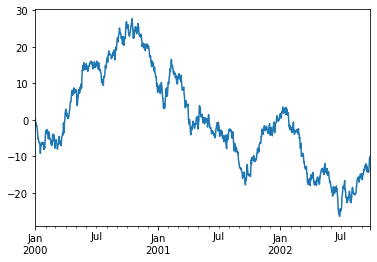

In [115]:
ts.plot()

On a DataFrame, the plot() method is a convenience to plot all of the columns with labels:

In [116]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])

In [117]:
df = df.cumsum()

<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

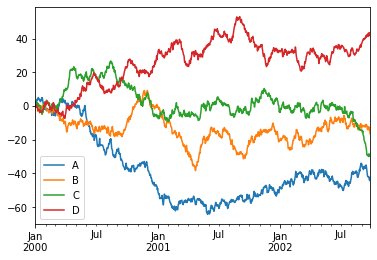

In [118]:
plt.figure()
df.plot()

###### Getting data in/out

In [119]:
df.to_csv('foo.csv')

In [120]:
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.650021,-0.553542,-0.041277,0.559767
1,2000-01-02,2.275051,0.593901,0.241632,-0.675253
2,2000-01-03,1.477981,-0.511608,0.935916,0.737946
3,2000-01-04,2.649534,0.051570,1.517167,0.637476
4,2000-01-05,2.639703,0.373580,1.897283,-0.760633
...,...,...,...,...,...
995,2002-09-22,-41.874477,-13.370458,-28.375963,41.528544
996,2002-09-23,-42.451158,-12.718711,-28.463996,42.751501
997,2002-09-24,-43.932307,-12.789267,-29.406379,43.629052
998,2002-09-25,-42.640615,-14.979609,-29.944805,43.381456


Reading and writing to HDFStores.

Writing to a HDF5 Store.

In [121]:
df.to_hdf('foo.h5', 'df')

Reading from a HDF5 Store.

In [122]:
pd.read_hdf('foo.h5', 'df')

,A,B,C,D
2000-01-01,0.650021,-0.553542,-0.041277,0.559767
2000-01-02,2.275051,0.593901,0.241632,-0.675253
2000-01-03,1.477981,-0.511608,0.935916,0.737946
2000-01-04,2.649534,0.051570,1.517167,0.637476
2000-01-05,2.639703,0.373580,1.897283,-0.760633
...,...,...,...,...
2002-09-22,-41.874477,-13.370458,-28.375963,41.528544
2002-09-23,-42.451158,-12.718711,-28.463996,42.751501
2002-09-24,-43.932307,-12.789267,-29.406379,43.629052
2002-09-25,-42.640615,-14.979609,-29.944805,43.381456


Reading and writing to MS Excel.

Writing to an excel file.

In [123]:
df.to_excel('foo.xlsx', sheet_name='Sheet1')

In [124]:
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.650021,-0.553542,-0.041277,0.559767
1,2000-01-02,2.275051,0.593901,0.241632,-0.675253
2,2000-01-03,1.477981,-0.511608,0.935916,0.737946
3,2000-01-04,2.649534,0.051570,1.517167,0.637476
4,2000-01-05,2.639703,0.373580,1.897283,-0.760633
...,...,...,...,...,...
995,2002-09-22,-41.874477,-13.370458,-28.375963,41.528544
996,2002-09-23,-42.451158,-12.718711,-28.463996,42.751501
997,2002-09-24,-43.932307,-12.789267,-29.406379,43.629052
998,2002-09-25,-42.640615,-14.979609,-29.944805,43.381456


###### Series

Series is a one-dimensional labeled array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.).

The axis labels are collectively referred to as the index. The basic method to create a Series is to call:

s = pd.Series(data, index=index)



Here, data can be many different things:

    a Python dict

    an ndarray

    a scalar value (like 5)

The passed index is a list of axis labels. Thus, this separates into a few cases depending on what data is:

From ndarray

If data is an ndarray, index must be the same length as data. If no index is passed, one will be created having values [0, ..., len(data) - 1].

In [125]:
s = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])

In [126]:
s

a    1.131250
b    1.392750
c    0.215617
d   -0.582377
e   -0.212997
dtype: float64

In [129]:
ind = pd.date_range('2010-01-01', periods =30)
ind

DatetimeIndex(['2010-01-01', '2010-01-02', '2010-01-03', '2010-01-04',
               '2010-01-05', '2010-01-06', '2010-01-07', '2010-01-08',
               '2010-01-09', '2010-01-10', '2010-01-11', '2010-01-12',
               '2010-01-13', '2010-01-14', '2010-01-15', '2010-01-16',
               '2010-01-17', '2010-01-18', '2010-01-19', '2010-01-20',
               '2010-01-21', '2010-01-22', '2010-01-23', '2010-01-24',
               '2010-01-25', '2010-01-26', '2010-01-27', '2010-01-28',
               '2010-01-29', '2010-01-30'],
              dtype='datetime64[ns]', freq='D')

In [130]:
ind = pd.date_range('2010-01-01', periods =30, freq='2H')
ind

DatetimeIndex(['2010-01-01 00:00:00', '2010-01-01 02:00:00',
               '2010-01-01 04:00:00', '2010-01-01 06:00:00',
               '2010-01-01 08:00:00', '2010-01-01 10:00:00',
               '2010-01-01 12:00:00', '2010-01-01 14:00:00',
               '2010-01-01 16:00:00', '2010-01-01 18:00:00',
               '2010-01-01 20:00:00', '2010-01-01 22:00:00',
               '2010-01-02 00:00:00', '2010-01-02 02:00:00',
               '2010-01-02 04:00:00', '2010-01-02 06:00:00',
               '2010-01-02 08:00:00', '2010-01-02 10:00:00',
               '2010-01-02 12:00:00', '2010-01-02 14:00:00',
               '2010-01-02 16:00:00', '2010-01-02 18:00:00',
               '2010-01-02 20:00:00', '2010-01-02 22:00:00',
               '2010-01-03 00:00:00', '2010-01-03 02:00:00',
               '2010-01-03 04:00:00', '2010-01-03 06:00:00',
               '2010-01-03 08:00:00', '2010-01-03 10:00:00'],
              dtype='datetime64[ns]', freq='2H')

In [138]:
df = pd.Series(np.random.randint(100, size=30), index=ind, name='marks')
df

2010-01-01 00:00:00    17
2010-01-01 02:00:00    48
2010-01-01 04:00:00    80
2010-01-01 06:00:00    56
2010-01-01 08:00:00    60
2010-01-01 10:00:00    69
2010-01-01 12:00:00    33
2010-01-01 14:00:00    96
2010-01-01 16:00:00    23
2010-01-01 18:00:00    33
2010-01-01 20:00:00    27
2010-01-01 22:00:00    82
2010-01-02 00:00:00    93
2010-01-02 02:00:00    99
2010-01-02 04:00:00    26
2010-01-02 06:00:00    95
2010-01-02 08:00:00    69
2010-01-02 10:00:00    99
2010-01-02 12:00:00    90
2010-01-02 14:00:00    63
2010-01-02 16:00:00    62
2010-01-02 18:00:00    33
2010-01-02 20:00:00    76
2010-01-02 22:00:00    63
2010-01-03 00:00:00    37
2010-01-03 02:00:00    43
2010-01-03 04:00:00    20
2010-01-03 06:00:00    49
2010-01-03 08:00:00    82
2010-01-03 10:00:00     3
Freq: 2H, Name: marks, dtype: int32

###### From dict

Series can be instantiated from dicts:

In [139]:
d = {'b': 1, 'a': 0, 'c': 2}
pd.Series(d)

b    1
a    0
c    2
dtype: int64

Note

When the data is a dict, and an index is not passed, the Series index will be ordered by the dict’s insertion order, if you’re using Python version >= 3.6 and Pandas version >= 0.23.

If you’re using Python < 3.6 or Pandas < 0.23, and an index is not passed, the Series index will be the lexically ordered list of dict keys.

In the example above, if you were on a Python version lower than 3.6 or a Pandas version lower than 0.23, the Series would be ordered by the lexical order of the dict keys (i.e. ['a', 'b', 'c'] rather than ['b', 'a', 'c']).

If an index is passed, the values in data corresponding to the labels in the index will be pulled out.

In [140]:
d = {'a': 0., 'b': 1., 'c': 2.}
pd.Series(d)

a    0.0
b    1.0
c    2.0
dtype: float64

In [141]:
pd.Series(d, index=['b', 'c', 'd', 'a'])

b    1.0
c    2.0
d    NaN
a    0.0
dtype: float64

###### From scalar value

If data is a scalar value, an index must be provided. The value will be repeated to match the length of the index

In [142]:
pd.Series(5, index=[1,2,3,4])

1    5
2    5
3    5
4    5
dtype: int64

###### Series is ndarray-like

Series acts very similarly to a ndarray, and is a valid argument to most NumPy functions. However, operations such as slicing will also slice the index.

In [143]:
s

a    1.131250
b    1.392750
c    0.215617
d   -0.582377
e   -0.212997
dtype: float64

In [144]:
s[0]

1.1312504436294823

In [145]:
s[:3]

a    1.131250
b    1.392750
c    0.215617
dtype: float64

In [146]:
s[s > s.median()]

a    1.13125
b    1.39275
dtype: float64

In [147]:
s[[ 4, 3, 1]]

e   -0.212997
d   -0.582377
b    1.392750
dtype: float64

In [148]:
np.exp(s)  #calculate exponential of all elements 

a    3.099530
b    4.025907
c    1.240627
d    0.558569
e    0.808159
dtype: float64

Like a numpy array pandas series has a dtype.

In [149]:
s.dtype

dtype('float64')

This is often a NumPy dtype. However, pandas and 3rd-party libraries extend NumPy’s type system in a few places, in which case the dtype would be an ExtensionDtype. Some examples within pandas are Categorical data and Nullable integer data type. See dtypes for mor

In [150]:
s.array

<PandasArray>
[  1.1312504436294823,   1.3927501740727006,  0.21561715555750666,
  -0.5823772636687062, -0.21299669242759967]
Length: 5, dtype: float64

Accessing the array can be useful when you need to do some operation without the index. 

Series.array will always be an ExtensionArray. Briefly, an ExtensionArray is a thin wrapper around one or more concrete arrays like a numpy.ndarray. Pandas knows how to take an ExtensionArray and store it in a Series or a column of a DataFrame.


While Series is ndarray-like, if you need an actual ndarray, then use Series.to_numpy().

In [154]:
s.to_numpy()

array([ 1.13125044,  1.39275017,  0.21561716, -0.58237726, -0.21299669])

Even if the Series is backed by a ExtensionArray, Series.to_numpy() will return a NumPy ndarray.

###### Series is dict-like

A Series is like a fixed-size dict in that you can get and set values by index label:

In [155]:
s['a']

1.1312504436294823

In [156]:
s['e']

-0.21299669242759967

In [157]:
s['e']=12
s

a     1.131250
b     1.392750
c     0.215617
d    -0.582377
e    12.000000
dtype: float64

If a label is not contained, an exception is raised:

In [158]:
s['f']

KeyError: 'f'

Using the get method, a missing label will return None or specified default:

In [159]:
s.get('f')

In [160]:
s.get('f', np.nan)

nan

In [161]:
s.get('e', np.nan)

12.0

###### Vectorized operations and label alignment with Series

When working with raw NumPy arrays, looping through value-by-value is usually not necessary. The same is true when working with Series in pandas. Series can also be passed into most NumPy methods expecting an ndarray.

In [162]:
s+s

a     2.262501
b     2.785500
c     0.431234
d    -1.164755
e    24.000000
dtype: float64

In [163]:
s*2

a     2.262501
b     2.785500
c     0.431234
d    -1.164755
e    24.000000
dtype: float64

In [164]:
s  # original s is not altered

a     1.131250
b     1.392750
c     0.215617
d    -0.582377
e    12.000000
dtype: float64

In [165]:
np.exp(s)

a         3.099530
b         4.025907
c         1.240627
d         0.558569
e    162754.791419
dtype: float64

A key difference between Series and ndarray is that operations between Series automatically align the data based on label. Thus, you can write computations without giving consideration to whether the Series involved have the same labels.

In [166]:
s[1:] + s[:-1]

a         NaN
b    2.785500
c    0.431234
d   -1.164755
e         NaN
dtype: float64

In [167]:
s[1:]

b     1.392750
c     0.215617
d    -0.582377
e    12.000000
dtype: float64

In [168]:
s[:-1]

a    1.131250
b    1.392750
c    0.215617
d   -0.582377
dtype: float64

The result of an operation between unaligned Series will have the union of the indexes involved. If a label is not found in one Series or the other, the result will be marked as missing NaN. Being able to write code without doing any explicit data alignment grants immense freedom and flexibility in interactive data analysis and research. The integrated data alignment features of the pandas data structures set pandas apart from the majority of related tools for working with labeled data.

In general, we chose to make the default result of operations between differently indexed objects yield the union of the indexes in order to avoid loss of information. Having an index label, though the data is missing, is typically important information as part of a computation. You of course have the option of dropping labels with missing data via the dropna function

###### Name attribute

Series can also have a name attribute:

In [169]:
s = pd.Series(np.random.randn(5), name='something')
s

0   -0.701499
1    0.831024
2   -0.589118
3   -1.161493
4   -0.951336
Name: something, dtype: float64

In [170]:
s.name

'something'

The Series name will be assigned automatically in many cases, in particular when taking 1D slices of DataFrame as you will see below.

You can rename a Series with the pandas.Series.rename() method.

In [171]:
s2 = s.rename('different')
s2.name

'different'

Note that s and s2 refer to different objects

###### DataFrame

DataFrame is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or SQL table, or a dict of Series objects. It is generally the most commonly used pandas object. Like Series, DataFrame accepts many different kinds of input:

    Dict of 1D ndarrays, lists, dicts, or Series

    2-D numpy.ndarray

    Structured or record ndarray

    A Series

    Another DataFrame


Along with the data, you can optionally pass index (row labels) and columns (column labels) arguments. If you pass an index and / or columns, you are guaranteeing the index and / or columns of the resulting DataFrame. Thus, a dict of Series plus a specific index will discard all data not matching up to the passed index.

If axis labels are not passed, they will be constructed from the input data based on common sense rules.

###### From dict of Series or dicts

In [172]:
d = { 'one': pd.Series([1,2,3], index=['a','b','c']),
     'two': pd.Series([1,2,3,4], index=['a','b','c','d'])
    }

df = pd.DataFrame(d)

df

,one,two
a,1.0,1
b,2.0,2
c,3.0,3
d,NaN,4


In [173]:
pd.DataFrame(d, index=['d','b','a'])

,one,two
d,NaN,4
b,2.0,2
a,1.0,1


In [174]:
pd.DataFrame(d, index=['d', 'b', 'a'], columns=['two', 'three'])

,two,three
d,4,NaN
b,2,NaN
a,1,NaN


The row and column labels can be accessed respectively by accessing the index and columns attributes:

When a particular set of columns are passed with a dict of data, the passed columns override the keys in the dict

In [175]:
df.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [176]:
df.columns

Index(['one', 'two'], dtype='object')

###### From dict of ndarrays / lists

The ndarrays must all be the same length. If an index is passed, it must clearly also be the same length as the arrays. If no index is passed, the result will be range(n), where n is the array length

In [177]:
d = {'one': [1., 2., 3., 4.],
     'two': [4., 3., 2., 1.]}

pd.DataFrame(d, index=['a','b','c','d'])

,one,two
a,1.0,4.0
b,2.0,3.0
c,3.0,2.0
d,4.0,1.0


###### From structured or record array

THis case is handled identically to a dict of arrays

In [178]:
data = np.zeros((2,), dtype=[('A','i4'),('B','f4'),('C','a10')])
data[:]

array([(0, 0., b''), (0, 0., b'')],
      dtype=[('A', '<i4'), ('B', '<f4'), ('C', 'S10')])

In [179]:
data[:] = [(1, 2., 'Hello'), (2, 3., "World")]

In [180]:
pd.DataFrame(data, index=['first', 'second'])

,A,B,C
first,1,2.0,b'Hello'
second,2,3.0,b'World'


In [181]:
pd.DataFrame(data, columns=['C','A','B'])

,C,A,B
0,b'Hello',1,2.0
1,b'World',2,3.0


###### From a list of dicts

In [182]:
data2 = [{'a': 1, 'b': 2}, {'a': 5, 'b': 10, 'c': 20}]
pd.DataFrame(data2)

,a,b,c
0,1,2,NaN
1,5,10,20.0


In [183]:
pd.DataFrame(data2, index=['first','second'])

,a,b,c
first,1,2,NaN
second,5,10,20.0


In [184]:
pd.DataFrame(data2, columns=['a','b'])

,a,b
0,1,2
1,5,10


###### From a dict of tuples

You can automatically create a MultiIndexed frame by passing a tuples dictionary.

In [185]:
pd.DataFrame({('a', 'b'): {('A', 'B'): 1, ('A', 'C'): 2},
              ('a', 'a'): {('A', 'C'): 3, ('A', 'B'): 4},
              ('a', 'c'): {('A', 'B'): 5, ('A', 'C'): 6},
              ('b', 'a'): {('A', 'C'): 7, ('A', 'B'): 8},
              ('b', 'b'): {('A', 'D'): 9, ('A', 'B'): 10}})

a              b      
       b    a    c    a     b
A B  1.0  4.0  5.0  8.0  10.0
  C  2.0  3.0  6.0  7.0   NaN
  D  NaN  NaN  NaN  NaN   9.0

###### From a Series

The result will be a DataFrame with the same index as the input Series, and with one column whose name is the original name of the Series (only if no other column name provided)

In [186]:
pd.DataFrame(pd.Series([1,2,3,4,5]))

,0
0,1
1,2
2,3
3,4
4,5


In [194]:
pd.DataFrame(pd.Series([1,2,3,4,5], index=['a','b','c','d','e']), columns=['A'])

,A
a,1
b,2
c,3
d,4
e,5


###### From a list of dataclasses

Data Classes as introduced in PEP557, can be passed into the DataFrame constructor. Passing a list of dataclasses is equivalent to passing a list of dictionaries.

Please be aware, that that all values in the list should be dataclasses, mixing types in the list would result in a TypeError.

In [195]:
from dataclasses import make_dataclass

In [196]:
Point = make_dataclass("Point", [("x", int), ("y", int)])

In [197]:
pd.DataFrame([Point(0, 0), Point(0, 3), Point(2, 3)])

,x,y
0,0,0
1,0,3
2,2,3


In [199]:
import dataclasses
dir(dataclasses)

['Field',
 'FrozenInstanceError',
 'InitVar',
 'MISSING',
 '_DataclassParams',
 '_EMPTY_METADATA',
 '_FIELD',
 '_FIELDS',
 '_FIELD_BASE',
 '_FIELD_CLASSVAR',
 '_FIELD_INITVAR',
 '_HAS_DEFAULT_FACTORY',
 '_HAS_DEFAULT_FACTORY_CLASS',
 '_InitVarMeta',
 '_MISSING_TYPE',
 '_MODULE_IDENTIFIER_RE',
 '_PARAMS',
 '_POST_INIT_NAME',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_asdict_inner',
 '_astuple_inner',
 '_cmp_fn',
 '_create_fn',
 '_field_assign',
 '_field_init',
 '_frozen_get_del_attr',
 '_get_field',
 '_hash_action',
 '_hash_add',
 '_hash_exception',
 '_hash_fn',
 '_hash_set_none',
 '_init_fn',
 '_init_param',
 '_is_classvar',
 '_is_dataclass_instance',
 '_is_initvar',
 '_is_type',
 '_process_class',
 '_recursive_repr',
 '_repr_fn',
 '_set_new_attribute',
 '_thread',
 '_tuple_str',
 'asdict',
 'astuple',
 'builtins',
 'copy',
 'dataclass',
 'field',
 'fields',
 'functools',
 'inspect',
 'is_dataclass',


###### Missing data

To construct a DataFrame with missing data, we use np.nan to represent missing values. Alternatively, you may pass a numpy.MaskedArray as the data argument to the DataFrame constructor, and its masked entries will be considered missing.

In [205]:
pd.DataFrame(pd.Series(np.nan ,index=[1,2,3,4]), columns=["A"])

,A
1,NaN
2,NaN
3,NaN
4,NaN


###### Alternate constructors

###### DataFrame.from_dict

DataFrame.from_dict takes a dict of dicts or a dict of array-like sequences and returns a DataFrame. It operates like the DataFrame constructor except for the orient parameter which is 'columns' by default, but which can be set to 'index' in order to use the dict keys as row labels.

In [215]:
pd.DataFrame.from_dict(dict([('A', [1,2,3]),('B',[4,5,6])]))

,A,B
0,1,4
1,2,5
2,3,6


If you pass orient = 'index', the keys will be row labels. In this case, you can also pass the desired column names:

In [216]:
pd.DataFrame.from_dict(dict([('A',[1,2,3]), ('B',[4,5,6])]), orient='index', columns=['one','two','three'])

,one,two,three
A,1,2,3
B,4,5,6


###### DataFrame.from_records

DataFrame.from_records takes a list of tuples or an ndarray with structured dtype. It works analogously to the normal DataFrame constructor, except that the resulting DataFrame index may be a specific field of the structured dtype. For example:

In [217]:
data

array([(1, 2., b'Hello'), (2, 3., b'World')],
      dtype=[('A', '<i4'), ('B', '<f4'), ('C', 'S10')])

In [218]:
pd.DataFrame.from_records(data, index='C')

,A,B
C,,
b'Hello',1,2.0
b'World',2,3.0


###### Column selection, addition, deletion

You can treat a DataFrame semantically like a dict of like-indexed Series objects. Getting, setting, and deleting columns works with the same syntax as the analogous dict operations:

In [227]:
df

,one,two
a,1.0,1
b,2.0,2
c,3.0,3
d,NaN,4


In [228]:
df['one']

a    1.0
b    2.0
c    3.0
d    NaN
Name: one, dtype: float64

In [229]:
df['three'] = df['one']*df['two']

In [230]:
df

,one,two,three
a,1.0,1,1.0
b,2.0,2,4.0
c,3.0,3,9.0
d,NaN,4,NaN


In [231]:
df['flag'] = df['one']>2

In [232]:
df

,one,two,three,flag
a,1.0,1,1.0,False
b,2.0,2,4.0,False
c,3.0,3,9.0,True
d,NaN,4,NaN,False


Columns can be deleted or popped like with a dict:

In [234]:
del df['two']

In [235]:
df

,one,three,flag
a,1.0,1.0,False
b,2.0,4.0,False
c,3.0,9.0,True
d,NaN,NaN,False


In [236]:
three = df.pop('three')

In [237]:
df

,one,flag
a,1.0,False
b,2.0,False
c,3.0,True
d,NaN,False


When inserting a scalar value, it will naturally be propagated to fill the column:

In [238]:
df['foo'] = 'bar'
df

,one,flag,foo
a,1.0,False,bar
b,2.0,False,bar
c,3.0,True,bar
d,NaN,False,bar


When inserting a Series that does not have the same index as the DataFrame, it will be conformed to the DataFrame’s index:

In [239]:
df['one_trunc'] = df['one'][:2]
df

,one,flag,foo,one_trunc
a,1.0,False,bar,1.0
b,2.0,False,bar,2.0
c,3.0,True,bar,NaN
d,NaN,False,bar,NaN


You can insert raw ndarrays but their length must match the length of the DataFrame’s index.

By default, columns get inserted at the end. The insert function is available to insert at a particular location in the columns:

In [240]:
df.insert(1, 'bar', df['one'])

In [241]:
df

,one,bar,flag,foo,one_trunc
a,1.0,1.0,False,bar,1.0
b,2.0,2.0,False,bar,2.0
c,3.0,3.0,True,bar,NaN
d,NaN,NaN,False,bar,NaN


###### Assigning new columns in method chains

Inspired by dplyr’s mutate verb, DataFrame has an assign() method that allows you to easily create new columns that are potentially derived from existing columns.

In [282]:
iris = pd.read_csv('iris_dataset.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [283]:
iris.assign(sepal_ratio=iris['sepal_width']/iris['sepal_length']).head()

,sepal_length,sepal_width,petal_length,petal_width,sepal_ratio
0,5.1,3.5,1.4,0.2,0.686275
1,4.9,3.0,1.4,0.2,0.612245
2,4.7,3.2,1.3,0.2,0.680851
3,4.6,3.1,1.5,0.2,0.673913
4,5.0,3.6,1.4,0.2,0.720000


In the example above, we inserted a precomputed value. We can also pass in a function of one argument to be evaluated on the DataFrame being assigned to.

In [285]:
iris.assign(sepal_ratio = lambda x: (x['sepal_width']/ x['sepal_length'])).head()

,sepal_length,sepal_width,petal_length,petal_width,sepal_ratio
0,5.1,3.5,1.4,0.2,0.686275
1,4.9,3.0,1.4,0.2,0.612245
2,4.7,3.2,1.3,0.2,0.680851
3,4.6,3.1,1.5,0.2,0.673913
4,5.0,3.6,1.4,0.2,0.720000


assign always returns a copy of the data, leaving the original DataFrame untouched.

Passing a callable, as opposed to an actual value to be inserted, is useful when you don’t have a reference to the DataFrame at hand. This is common when using assign in a chain of operations. For example, we can limit the DataFrame to just those observations with a Sepal Length greater than 5, calculate the ratio, and plot:

<AxesSubplot:xlabel='sepalratio', ylabel='petalratio'>

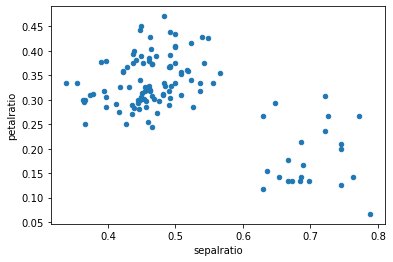

In [287]:
(iris.query('sepal_length > 5')
 .assign(sepalratio=lambda x: x.sepal_width/x.sepal_length,
        petalratio=lambda x: x.petal_width/x.petal_length)
 .plot(kind='scatter', x='sepalratio', y='petalratio')
)

Since a function is passed in, the function is computed on the DataFrame being assigned to. Importantly, this is the DataFrame that’s been filtered to those rows with sepal length greater than 5. The filtering happens first, and then the ratio calculations. This is an example where we didn’t have a reference to the filtered DataFrame available.

The function signature for assign is simply **kwargs. The keys are the column names for the new fields, and the values are either a value to be inserted (for example, a Series or NumPy array), or a function of one argument to be called on the DataFrame. A copy of the original DataFrame is returned, with the new values inserted

In [289]:
iris['sepalratio']=iris.sepal_width/iris.sepal_length

In [290]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,sepalratio
0,5.1,3.5,1.4,0.2,0.686275
1,4.9,3.0,1.4,0.2,0.612245
2,4.7,3.2,1.3,0.2,0.680851
3,4.6,3.1,1.5,0.2,0.673913
4,5.0,3.6,1.4,0.2,0.720000


In [291]:
iris['petalratio']=iris.petal_width/iris.petal_length

In [292]:
iris

,sepal_length,sepal_width,petal_length,petal_width,sepalratio,petalratio
0,5.1,3.5,1.4,0.2,0.686275,0.142857
1,4.9,3.0,1.4,0.2,0.612245,0.142857
2,4.7,3.2,1.3,0.2,0.680851,0.153846
3,4.6,3.1,1.5,0.2,0.673913,0.133333
4,5.0,3.6,1.4,0.2,0.720000,0.142857
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0.447761,0.442308
146,6.3,2.5,5.0,1.9,0.396825,0.380000
147,6.5,3.0,5.2,2.0,0.461538,0.384615
148,6.2,3.4,5.4,2.3,0.548387,0.425926


<AxesSubplot:xlabel='sepalratio', ylabel='petalratio'>

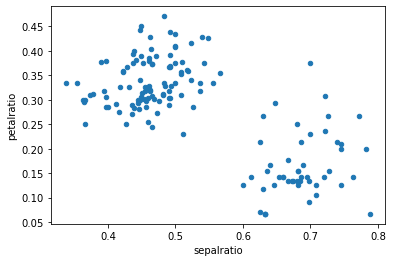

In [297]:
iris[['sepalratio','petalratio']].plot(kind='scatter', x='sepalratio',y='petalratio')



Changed in version 0.23.0.

Starting with Python 3.6 the order of **kwargs is preserved. This allows for dependent assignment, where an expression later in **kwargs can refer to a column created earlier in the same assign().

In [298]:
dfa = pd.DataFrame({"A": [1, 2, 3],
                   "B": [4, 5, 6]})

dfa.assign(C=lambda x: x['A'] + x['B'],
          D=lambda x: x['A'] + x['C'])

,A,B,C,D
0,1,4,5,6
1,2,5,7,9
2,3,6,9,12


In the second expression, x['C'] will refer to the newly created column, that’s equal to dfa['A'] + dfa['B'].

###### Indexing / selection

The basics of indexing are as follows:

    Operation                      Syntax             Result

    Select column                  df[col]            Series
    Select row by label            df.loc[label]      Series
    Select row by integer location df.iloc[loc]       Series
    Slice rows                     df[5:10]           DataFrame
    Select rows by boolean vector  df[bool_vec]       DataFrame

In [299]:
df

,one,bar,flag,foo,one_trunc
a,1.0,1.0,False,bar,1.0
b,2.0,2.0,False,bar,2.0
c,3.0,3.0,True,bar,NaN
d,NaN,NaN,False,bar,NaN


In [300]:
df.loc['b']

one              2
bar              2
flag         False
foo            bar
one_trunc        2
Name: b, dtype: object

In [302]:
df.loc['a':'d']

,one,bar,flag,foo,one_trunc
a,1.0,1.0,False,bar,1.0
b,2.0,2.0,False,bar,2.0
c,3.0,3.0,True,bar,NaN
d,NaN,NaN,False,bar,NaN


In [306]:
df.loc['d']=df.loc['a']+df.loc['b']

In [307]:
df

,one,bar,flag,foo,one_trunc
a,1.0,1.0,False,bar,1.0
b,2.0,2.0,False,bar,2.0
c,3.0,3.0,True,bar,NaN
d,3.0,3.0,False,barbar,3.0


In [308]:
df.iloc[2]

one             3
bar             3
flag         True
foo           bar
one_trunc     NaN
Name: c, dtype: object

###### Data alignment and arithmetic

Data alignment between DataFrame objects automatically align on both the columns and the index (row labels). Again, the resulting object will have the union of the column and row labels.

In [309]:
df = pd.DataFrame(np.random.randn(10, 4), columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,-0.057090,0.327010,-0.727851,-0.632311
1,0.761776,-1.274433,-1.116745,0.506727
2,2.102835,0.176497,0.149647,-0.678861
3,0.481533,-0.125971,0.647434,-0.136671
4,-0.334988,1.342121,0.545080,1.347611
5,-0.210287,-0.156595,-0.435623,2.214404
6,-0.701020,-0.719234,1.417126,0.316317
7,0.008360,0.397874,1.001250,-0.182610
8,0.043222,0.265415,0.392651,-0.994313
9,-0.442622,-0.269621,0.168086,-2.409268


In [310]:
df2 = pd.DataFrame(np.random.randn(7, 3), columns=['A', 'B', 'C'])
df2

,A,B,C
0,-1.017388,0.678623,1.111135
1,-0.154473,0.854150,-0.611849
2,0.950968,-1.066437,-0.033628
3,-0.789276,-0.259575,1.191751
4,0.192652,-0.291004,0.274706
5,-0.272865,0.051917,0.944483
6,-0.186182,-0.274019,1.153765


In [311]:
df + df2

,A,B,C,D
0,-1.074479,1.005633,0.383284,NaN
1,0.607303,-0.420283,-1.728594,NaN
2,3.053803,-0.889940,0.116019,NaN
3,-0.307743,-0.385546,1.839185,NaN
4,-0.142336,1.051117,0.819785,NaN
5,-0.483152,-0.104677,0.508860,NaN
6,-0.887202,-0.993253,2.570891,NaN
7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN


When doing an operation between DataFrame and Series, the default behavior is to align the Series index on the DataFrame columns, thus broadcasting row-wise. For example:

In [312]:
df - df.iloc[0]

,A,B,C,D
0,0.000000,0.000000,0.000000,0.000000
1,0.818867,-1.601443,-0.388894,1.139038
2,2.159926,-0.150513,0.877499,-0.046550
3,0.538624,-0.452981,1.375286,0.495640
4,-0.277898,1.015111,1.272931,1.979922
5,-0.153196,-0.483605,0.292228,2.846715
6,-0.643930,-1.046244,2.144978,0.948628
7,0.065451,0.070864,1.729102,0.449701
8,0.100312,-0.061595,1.120503,-0.362002
9,-0.385531,-0.596632,0.895938,-1.776957


In the special case of working with time series data, if the DataFrame index contains dates, the broadcasting will be column-wise:

In [315]:
index = pd.date_range('1/1/2000', periods=8)

df = pd.DataFrame(np.random.randn(8, 3), index=index, columns=list('ABC'))
df

,A,B,C
2000-01-01,-0.174793,-1.171930,0.257859
2000-01-02,0.130993,-1.203450,0.903235
2000-01-03,1.125833,-0.862047,-1.057527
2000-01-04,-1.524812,0.710312,1.599739
2000-01-05,0.694879,-0.985498,0.351293
2000-01-06,1.335066,0.745814,0.913573
2000-01-07,0.317590,0.940899,0.562700
2000-01-08,-1.602424,0.446591,1.393954


In [316]:
type(df['A'])

pandas.core.series.Series

In [317]:
df - df['A']

,2000-01-01 00:00:00,2000-01-02 00:00:00,2000-01-03 00:00:00,2000-01-04 00:00:00,2000-01-05 00:00:00,2000-01-06 00:00:00,2000-01-07 00:00:00,2000-01-08 00:00:00,A,B,C
2000-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [318]:
df.sub(df['A'], axis=0)

,A,B,C
2000-01-01,0.0,-0.997138,0.432651
2000-01-02,0.0,-1.334444,0.772242
2000-01-03,0.0,-1.987880,-2.183360
2000-01-04,0.0,2.235124,3.124551
2000-01-05,0.0,-1.680377,-0.343586
2000-01-06,0.0,-0.589252,-0.421493
2000-01-07,0.0,0.623309,0.245110
2000-01-08,0.0,2.049015,2.996379


In [319]:
df * 5 + 2

,A,B,C
2000-01-01,1.126037,-3.859652,3.289295
2000-01-02,2.654967,-4.017251,6.516175
2000-01-03,7.629163,-2.310236,-3.287636
2000-01-04,-5.624059,5.551559,9.998696
2000-01-05,5.474395,-2.927490,3.756463
2000-01-06,8.675331,5.729070,6.567867
2000-01-07,3.587948,6.704493,4.813498
2000-01-08,-6.012121,4.232954,8.969772


In [320]:
1 / df

,A,B,C
2000-01-01,-5.721068,-0.853293,3.878090
2000-01-02,7.633970,-0.830944,1.107132
2000-01-03,0.888231,-1.160029,-0.945602
2000-01-04,-0.655819,1.407832,0.625102
2000-01-05,1.439100,-1.014715,2.846629
2000-01-06,0.749027,1.340817,1.094603
2000-01-07,3.148718,1.062814,1.777147
2000-01-08,-0.624054,2.239186,0.717384


In [321]:
df ** 4

,A,B,C
2000-01-01,0.000933,1.886285,0.004421
2000-01-02,0.000294,2.097551,0.665584
2000-01-03,1.606554,0.552235,1.250737
2000-01-04,5.405862,0.254564,6.549330
2000-01-05,0.233151,0.943242,0.015229
2000-01-06,3.176955,0.309401,0.696584
2000-01-07,0.010173,0.783739,0.100255
2000-01-08,6.593409,0.039778,3.775672


In [322]:
df1 = pd.DataFrame({'a': [1, 0, 1], 'b': [0, 1, 1]}, dtype=bool)

df2 = pd.DataFrame({'a': [0, 1, 1], 'b': [1, 1, 0]}, dtype=bool)

In [323]:
df1 & df2

,a,b
0,False,False
1,False,True
2,True,False


In [324]:
df1 | df2

,a,b
0,True,True
1,True,True
2,True,True


In [325]:
df1 ^ df2

,a,b
0,True,True
1,True,False
2,False,True


In [326]:
-df1

,a,b
0,False,True
1,True,False
2,False,False


In [327]:
df.T

,2000-01-01,2000-01-02,2000-01-03,2000-01-04,2000-01-05,2000-01-06,2000-01-07,2000-01-08
A,-0.174793,0.130993,1.125833,-1.524812,0.694879,1.335066,0.317590,-1.602424
B,-1.171930,-1.203450,-0.862047,0.710312,-0.985498,0.745814,0.940899,0.446591
C,0.257859,0.903235,-1.057527,1.599739,0.351293,0.913573,0.562700,1.393954


###### DataFrame interoperability with NumPy functions

Elementwise NumPy ufuncs (log, exp, sqrt, …) and various other NumPy functions can be used with no issues on Series and DataFrame, assuming the data within are numeric:

In [328]:
np.exp(df)

,A,B,C
2000-01-01,0.839631,0.309768,1.294156
2000-01-02,1.139960,0.300157,2.467573
2000-01-03,3.082783,0.422297,0.347314
2000-01-04,0.217662,2.034626,4.951741
2000-01-05,2.003467,0.373253,1.420903
2000-01-06,3.800247,2.108157,2.493216
2000-01-07,1.373812,2.562283,1.755405
2000-01-08,0.201408,1.562975,4.030758


In [329]:
np.asarray(df)

array([[-0.17479253, -1.17193039,  0.2578589 ],
       [ 0.13099344, -1.20345024,  0.90323499],
       [ 1.12583268, -0.86204712, -1.05752715],
       [-1.52481178,  0.71031185,  1.5997393 ],
       [ 0.69487896, -0.98549808,  0.35129265],
       [ 1.33506613,  0.74581404,  0.91357341],
       [ 0.31758957,  0.94089859,  0.56269959],
       [-1.60242426,  0.44659083,  1.39395435]])

DataFrame is not intended to be a drop-in replacement for ndarray as its indexing semantics and data model are quite different in places from an n-dimensional array.

In [330]:
ser = pd.Series([1, 2, 3, 4])
np.exp(ser)

0     2.718282
1     7.389056
2    20.085537
3    54.598150
dtype: float64



Changed in version 0.25.0: When multiple Series are passed to a ufunc, they are aligned before performing the operation.

Like other parts of the library, pandas will automatically align labeled inputs as part of a ufunc with multiple inputs. For example, using numpy.remainder() on two Series with differently ordered labels will align before the operation.

In [331]:
ser1 = pd.Series([1, 2, 3], index=['a', 'b', 'c'])

ser2 = pd.Series([1, 3, 5], index=['b', 'a', 'c'])

ser1

a    1
b    2
c    3
dtype: int64

In [332]:
ser2

b    1
a    3
c    5
dtype: int64

In [333]:
np.remainder(ser1, ser2)

a    1
b    0
c    3
dtype: int64

As usual, the union of the two indices is taken, and non-overlapping values are filled with missing values.

In [334]:
ser3 = pd.Series([2, 4, 6], index=['b', 'c', 'd'])

In [335]:
np.remainder(ser1, ser3)

a    NaN
b    0.0
c    3.0
d    NaN
dtype: float64

When a binary ufunc is applied to a Series and Index, the Series implementation takes precedence and a Series is returned.

In [336]:
ser = pd.Series([1, 2, 3])
idx = pd.Index([4, 5, 6])

np.maximum(ser, idx)

0    4
1    5
2    6
dtype: int64

NumPy ufuncs are safe to apply to Series backed by non-ndarray arrays, for example arrays.SparseArray (see Sparse calculation). If possible, the ufunc is applied without converting the underlying data to an ndarray.

###### Console display

In [337]:
iris

,sepal_length,sepal_width,petal_length,petal_width,sepalratio,petalratio
0,5.1,3.5,1.4,0.2,0.686275,0.142857
1,4.9,3.0,1.4,0.2,0.612245,0.142857
2,4.7,3.2,1.3,0.2,0.680851,0.153846
3,4.6,3.1,1.5,0.2,0.673913,0.133333
4,5.0,3.6,1.4,0.2,0.720000,0.142857
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0.447761,0.442308
146,6.3,2.5,5.0,1.9,0.396825,0.380000
147,6.5,3.0,5.2,2.0,0.461538,0.384615
148,6.2,3.4,5.4,2.3,0.548387,0.425926


In [338]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   sepalratio    150 non-null    float64
 5   petalratio    150 non-null    float64
dtypes: float64(6)
memory usage: 7.2 KB


However, using to_string will return a string representation of the DataFrame in tabular form, though it won’t always fit the console width:

Wide DataFrames will be printed across multiple rows by default:

In [339]:
pd.DataFrame(np.random.randn(3, 12))

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.182889,-0.037785,-0.991544,-1.480668,-1.470476,1.433774,0.094425,0.877990,-1.860260,-1.645446,-1.179248,0.355960
1,-0.061009,-0.348869,0.404785,-0.101883,0.215064,0.272697,-0.184695,-0.429989,0.621165,0.148032,-0.256567,-1.133174
2,2.382672,0.962546,-0.324516,0.260333,0.531754,-1.136252,-0.204949,0.504742,-0.752624,-1.625206,-0.630927,0.503449


If a DataFrame column label is a valid Python variable name, the column can be accessed like an attribute:

In [340]:
df = pd.DataFrame({'foo1': np.random.randn(5),
                   'foo2': np.random.randn(5)})

df.foo1

0   -1.120053
1   -0.313525
2   -0.063353
3    0.694110
4    1.251548
Name: foo1, dtype: float64

The columns are also connected to the IPython completion mechanism so they can be tab-completed:

###### Essential basic functionality

In [341]:
index = pd.date_range('1/1/2000', periods=8)

s = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])

df = pd.DataFrame(np.random.randn(8, 3), index=index, columns=['A', 'B', 'C'])

In [342]:
s

a    0.819477
b    1.317327
c    1.156456
d    1.043830
e    0.700338
dtype: float64

In [343]:
df

,A,B,C
2000-01-01,-0.343437,1.290194,-1.703998
2000-01-02,0.983688,0.263465,1.177015
2000-01-03,-1.071336,0.774450,-1.198044
2000-01-04,-0.593553,-0.185788,-0.802695
2000-01-05,-1.124989,0.955639,1.848256
2000-01-06,0.616908,-1.436798,0.413347
2000-01-07,-0.671035,1.331876,-0.972637
2000-01-08,2.057089,1.508871,1.853946


In [344]:
s.head()

a    0.819477
b    1.317327
c    1.156456
d    1.043830
e    0.700338
dtype: float64

In [345]:
df.head()

,A,B,C
2000-01-01,-0.343437,1.290194,-1.703998
2000-01-02,0.983688,0.263465,1.177015
2000-01-03,-1.071336,0.774450,-1.198044
2000-01-04,-0.593553,-0.185788,-0.802695
2000-01-05,-1.124989,0.955639,1.848256


In [346]:
df.tail()

,A,B,C
2000-01-04,-0.593553,-0.185788,-0.802695
2000-01-05,-1.124989,0.955639,1.848256
2000-01-06,0.616908,-1.436798,0.413347
2000-01-07,-0.671035,1.331876,-0.972637
2000-01-08,2.057089,1.508871,1.853946


###### Attributes and underlying data

pandas objects have a number of attributes enabling you to access the metadata



    shape: gives the axis dimensions of the object, consistent with ndarray

    Axis labels

            Series: index (only axis)

            DataFrame: index (rows) and columns



In [347]:
df[:2]

,A,B,C
2000-01-01,-0.343437,1.290194,-1.703998
2000-01-02,0.983688,0.263465,1.177015


In [348]:
df.columns

Index(['A', 'B', 'C'], dtype='object')

In [349]:
df.columns = [x.lower() for x in df.columns]

In [350]:
df

,a,b,c
2000-01-01,-0.343437,1.290194,-1.703998
2000-01-02,0.983688,0.263465,1.177015
2000-01-03,-1.071336,0.774450,-1.198044
2000-01-04,-0.593553,-0.185788,-0.802695
2000-01-05,-1.124989,0.955639,1.848256
2000-01-06,0.616908,-1.436798,0.413347
2000-01-07,-0.671035,1.331876,-0.972637
2000-01-08,2.057089,1.508871,1.853946


Pandas objects (Index, Series, DataFrame) can be thought of as containers for arrays, which hold the actual data and do the actual computation. For many types, the underlying array is a numpy.ndarray. However, pandas and 3rd party libraries may extend NumPy’s type system to add support for custom arrays 

To get the actual data inside a Index or Series, use the .array property

In [351]:
s.array

<PandasArray>
[ 0.819477127907099, 1.3173269884291492,  1.156455755186109,
  1.043830158175126,  0.700337812729769]
Length: 5, dtype: float64

In [352]:
s.index.array

<PandasArray>
['a', 'b', 'c', 'd', 'e']
Length: 5, dtype: object

array will always be an ExtensionArray. The exact details of what an ExtensionArray is and why pandas uses them are a bit beyond the scope of this introduction

If you know you need a NumPy array, use to_numpy() or numpy.asarray().

In [353]:
s.to_numpy()

array([0.81947713, 1.31732699, 1.15645576, 1.04383016, 0.70033781])

In [354]:
np.asarray(s)

array([0.81947713, 1.31732699, 1.15645576, 1.04383016, 0.70033781])

When the Series or Index is backed by an ExtensionArray, to_numpy() may involve copying data and coercing values

to_numpy() gives some control over the dtype of the resulting numpy.ndarray. For example, consider datetimes with timezones. NumPy doesn’t have a dtype to represent timezone-aware datetimes, so there are two possibly useful representations:

    An object-dtype numpy.ndarray with Timestamp objects, each with the correct tz

    A datetime64[ns] -dtype numpy.ndarray, where the values have been converted to UTC and the timezone discarded

Timezones may be preserved with dtype=object

In [356]:
ser = pd.Series(pd.date_range('2000', periods=2, tz="CET"))

ser.to_numpy(dtype=object)

array([Timestamp('2000-01-01 00:00:00+0100', tz='CET', freq='D'),
       Timestamp('2000-01-02 00:00:00+0100', tz='CET', freq='D')],
      dtype=object)

In [357]:
ser.to_numpy(dtype="datetime64[ns]")

array(['1999-12-31T23:00:00.000000000', '2000-01-01T23:00:00.000000000'],
      dtype='datetime64[ns]')

Getting the “raw data” inside a DataFrame is possibly a bit more complex. When your DataFrame only has a single data type for all the columns, DataFrame.to_numpy() will return the underlying data:

In [358]:
df.to_numpy()

array([[-0.34343675,  1.29019424, -1.70399831],
       [ 0.98368764,  0.26346459,  1.17701491],
       [-1.07133596,  0.77444998, -1.19804367],
       [-0.59355281, -0.18578816, -0.80269506],
       [-1.12498886,  0.95563875,  1.84825585],
       [ 0.61690775, -1.43679841,  0.41334697],
       [-0.67103477,  1.3318755 , -0.97263736],
       [ 2.0570887 ,  1.50887113,  1.85394636]])

If a DataFrame contains homogeneously-typed data, the ndarray can actually be modified in-place, and the changes will be reflected in the data structure. For heterogeneous data (e.g. some of the DataFrame’s columns are not all the same dtype), this will not be the case. The values attribute itself, unlike the axis labels, cannot be assigned to.

In the past, pandas recommended Series.values or DataFrame.values for extracting the data from a Series or DataFrame. You’ll still find references to these in old code bases and online. Going forward, we recommend avoiding .values and using .array or .to_numpy(). .

values has the following drawbacks:

1. When your Series contains an extension type, it’s unclear whether Series.values returns a NumPy array or the extension array. Series.array will always return an ExtensionArray, and will never copy data. Series.to_numpy() will always return a NumPy array, potentially at the cost of copying / coercing values.

2. When your DataFrame contains a mixture of data types, DataFrame.values may involve copying data and coercing values to a common dtype, a relatively expensive operation. DataFrame.to_numpy(), being a method, makes it clearer that the returned NumPy array may not be a view on the same data in the DataFrame.

###### Accelerated operations

pandas has support for accelerating certain types of binary numerical and boolean operations using the numexpr library and the bottleneck libraries.

These libraries are especially useful when dealing with large data sets, and provide large speedups. numexpr uses smart chunking, caching, and multiple cores. bottleneck is a set of specialized cython routines that are especially fast when dealing with arrays that have nans.

In [359]:
import numexpr
import bottleneck

In [360]:
dir(numexpr)

['E',
 'MAX_THREADS',
 'NumExpr',
 '__builtins__',
 '__cached__',
 '__config__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_init_num_threads',
 'detect_number_of_cores',
 'detect_number_of_threads',
 'disassemble',
 'evaluate',
 'expressions',
 'get_info',
 'get_vml_version',
 'interpreter',
 'is_cpu_amd_intel',
 'ncores',
 'necompiler',
 'nthreads',
 'os',
 'platform',
 'print_versions',
 're_evaluate',
 'set_num_threads',
 'set_vml_accuracy_mode',
 'set_vml_num_threads',
 'show_config',
 'test',
 'use_vml',
 'utils',
 'version']

In [361]:
dir(bottleneck)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_pytesttester',
 '_version',
 'allnan',
 'anynan',
 'argpartition',
 'bench',
 'bench_detailed',
 'benchmark',
 'get_functions',
 'median',
 'move',
 'move_argmax',
 'move_argmin',
 'move_max',
 'move_mean',
 'move_median',
 'move_min',
 'move_rank',
 'move_std',
 'move_sum',
 'move_var',
 'nanargmax',
 'nanargmin',
 'nanmax',
 'nanmean',
 'nanmedian',
 'nanmin',
 'nanrankdata',
 'nanstd',
 'nansum',
 'nanvar',
 'nonreduce',
 'nonreduce_axis',
 'partition',
 'push',
 'rankdata',
 'reduce',
 'replace',
 'slow',
 'ss',
 'test',
 'tests']

Here is a sample (using 100 column x 100,000 row DataFrames):

    Operation   0.11.0 (ms)   Prior Version (ms)   Ratio to Prior

    df1 > df2     13.32          125.35             0.1063
    df1 * df2     21.71           36.63             0.5928
    df1 + df2     22.04           36.50             0.6039
    
These are both enabled to be used by default, you can control this by setting the options:

    pd.set_option('compute.use_bottleneck', False)
    pd.set_option('compute.use_numexpr', False)

###### Flexible binary operations

With binary operations between pandas data structures, there are two key points of interest:

    Broadcasting behavior between higher- (e.g. DataFrame) and lower-dimensional (e.g. Series) objects.

    Missing data in computations.

We will demonstrate how to manage these issues independently, though they can be handled simultaneously.

###### Matching / broadcasting behavior

DataFrame has the methods add(), sub(), mul(), div() and related functions radd(), rsub(), … for carrying out binary operations. For broadcasting behavior, Series input is of primary interest. Using these functions, you can use to either match on the index or columns via the axis keyword:

In [362]:
df = pd.DataFrame({
   ....:     'one': pd.Series(np.random.randn(3), index=['a', 'b', 'c']),
   ....:     'two': pd.Series(np.random.randn(4), index=['a', 'b', 'c', 'd']),
   ....:     'three': pd.Series(np.random.randn(3), index=['b', 'c', 'd'])})

In [363]:
df

,one,two,three
a,-0.019899,0.530160,NaN
b,-1.015802,0.598463,-0.768510
c,0.778765,0.762021,1.424815
d,NaN,-1.764815,-0.332271


In [364]:
row = df.iloc[1]
row

one     -1.015802
two      0.598463
three   -0.768510
Name: b, dtype: float64

In [366]:
column = df['two']
column

a    0.530160
b    0.598463
c    0.762021
d   -1.764815
Name: two, dtype: float64

In [367]:
df.sub(row, axis='columns')

,one,two,three
a,0.995902,-0.068303,NaN
b,0.000000,0.000000,0.000000
c,1.794567,0.163558,2.193325
d,NaN,-2.363278,0.436239


In [368]:
df.sub(row, axis=1)

,one,two,three
a,0.995902,-0.068303,NaN
b,0.000000,0.000000,0.000000
c,1.794567,0.163558,2.193325
d,NaN,-2.363278,0.436239


In [369]:
df.sub(column, axis='index')

,one,two,three
a,-0.550060,0.0,NaN
b,-1.614265,0.0,-1.366973
c,0.016744,0.0,0.662794
d,NaN,0.0,1.432544


In [370]:
df.sub(column, axis=0)

,one,two,three
a,-0.550060,0.0,NaN
b,-1.614265,0.0,-1.366973
c,0.016744,0.0,0.662794
d,NaN,0.0,1.432544


Furthermore you can align a level of a MultiIndexed DataFrame with a Series.

In [373]:
dfmi = df.copy()

In [374]:
dfmi.index = pd.MultiIndex.from_tuples([(1, 'a'), (1, 'b'),
   ....:                                         (1, 'c'), (2, 'a')],
   ....:                                        names=['first', 'second'])


In [375]:
dfmi.sub(column, axis=0, level='second')

one       two     three
first second                              
1     a      -0.550060  0.000000       NaN
      b      -1.614265  0.000000 -1.366973
      c       0.016744  0.000000  0.662794
2     a            NaN -2.294975 -0.862431

Series and Index also support the divmod() builtin. This function takes the floor division and modulo operation at the same time returning a two-tuple of the same type as the left hand side. For example:

In [376]:
s = pd.Series(np.arange(10))

In [377]:
s

0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
dtype: int32

In [378]:
div, rem = divmod(s, 3)

In [379]:
div

0    0
1    0
2    0
3    1
4    1
5    1
6    2
7    2
8    2
9    3
dtype: int32

In [380]:
idx = pd.Index(np.arange(10))
div, rem = divmod(idx, 3)

In [381]:
div

Int64Index([0, 0, 0, 1, 1, 1, 2, 2, 2, 3], dtype='int64')

In [382]:
rem

Int64Index([0, 1, 2, 0, 1, 2, 0, 1, 2, 0], dtype='int64')

We can also do elementwise divmod():

In [383]:
div, rem = divmod(s, [2, 2, 3, 3, 4, 4, 5, 5, 6, 6])

In [384]:
div

0    0
1    0
2    0
3    1
4    1
5    1
6    1
7    1
8    1
9    1
dtype: int32

In [385]:
rem

0    0
1    1
2    2
3    0
4    0
5    1
6    1
7    2
8    2
9    3
dtype: int32

###### Missing data / operations with fill values

In Series and DataFrame, the arithmetic functions have the option of inputting a fill_value, namely a value to substitute when at most one of the values at a location are missing. For example, when adding two DataFrame objects, you may wish to treat NaN as 0 unless both DataFrames are missing that value, in which case the result will be NaN (you can later replace NaN with some other value using fillna if you wish).

In [387]:
df.add(df2, fill_value=0)

,a,b,one,three,two
a,NaN,NaN,-0.019899,NaN,0.530160
b,NaN,NaN,-1.015802,-0.768510,0.598463
c,NaN,NaN,0.778765,1.424815,0.762021
d,NaN,NaN,NaN,-0.332271,-1.764815
0,0,1,NaN,NaN,NaN
1,1,1,NaN,NaN,NaN
2,1,0,NaN,NaN,NaN


In [389]:
df.fillna(0)

,one,two,three
a,-0.019899,0.530160,0.000000
b,-1.015802,0.598463,-0.768510
c,0.778765,0.762021,1.424815
d,0.000000,-1.764815,-0.332271


###### Flexible comparisons

In [390]:
df.gt(df2)

,a,b,one,three,two
a,False,False,False,False,False
b,False,False,False,False,False
c,False,False,False,False,False
d,False,False,False,False,False
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False


In [391]:
df2.ne(df)

,a,b,one,three,two
0,True,True,True,True,True
1,True,True,True,True,True
2,True,True,True,True,True
a,True,True,True,True,True
b,True,True,True,True,True
c,True,True,True,True,True
d,True,True,True,True,True


These operations produce a pandas object of the same type as the left-hand-side input that is of dtype bool. These boolean objects can be used in indexing operations

###### Boolean reductions

You can apply the reductions: empty, any(), all(), and bool() to provide a way to summarize a boolean result.

In [392]:
(df > 0)

,one,two,three
a,False,True,False
b,False,True,False
c,True,True,True
d,False,False,False


In [393]:
(df > 0).all()

one      False
two      False
three    False
dtype: bool

In [394]:
(df > 0).any()

one      True
two      True
three    True
dtype: bool

You can reduce to a final boolean value.

In [395]:
(df > 0).any().any()

True

You can test if a pandas object is empty, via the empty property.

In [396]:
df.empty

False

In [397]:
pd.DataFrame(columns=list('ABC'))

,A,B,C


In [399]:
pd.DataFrame(columns=list('ABC')).empty

True

To evaluate single-element pandas objects in a boolean context, use the method bool():

In [400]:
pd.Series([True]).bool()

True

In [401]:
pd.Series([False]).bool()

False

In [402]:
pd.DataFrame([[True]]).bool()

True

In [403]:
pd.DataFrame([[False]]).bool()

False

###### Comparing if objects are equivalent

Often you may find that there is more than one way to compute the same result. As a simple example, consider df + df and df * 2. To test that these two computations produce the same result, given the tools shown above, you might imagine using (df + df == df * 2).all(). But in fact, this expression is False:

In [407]:
df+df == df * 2

,one,two,three
a,True,True,False
b,True,True,True
c,True,True,True
d,False,True,True


In [408]:
(df + df == df * 2).all()

one      False
two       True
three    False
dtype: bool

Notice that the boolean DataFrame df + df == df * 2 contains some False values! This is because NaNs do not compare as equals:

In [409]:
np.nan == np.nan

False

So, NDFrames (such as Series and DataFrames) have an equals() method for testing equality, with NaNs in corresponding locations treated as equal.

In [410]:
(df + df).equals(df * 2)

True

Note that the Series or DataFrame index needs to be in the same order for equality to be True:

In [411]:
df1 = pd.DataFrame({'col': ['foo', 0, np.nan]})
df1

,col
0,foo
1,0
2,NaN


In [412]:
df2 = pd.DataFrame({'col': [np.nan, 0, 'foo']}, index=[2, 1, 0])
df2

,col
2,NaN
1,0
0,foo


In [413]:
df1.equals(df2)

False

In [414]:
df1.equals(df2.sort_index())

True

Comparing array-like objects

You can conveniently perform element-wise comparisons when comparing a pandas data structure with a scalar value:

In [415]:
pd.Series(['foo', 'bar', 'baz']) == 'foo'

0     True
1    False
2    False
dtype: bool

In [416]:
pd.Index(['foo', 'bar', 'baz']) == 'foo'

array([ True, False, False])

Pandas also handles element-wise comparisons between different array-like objects of the same length:

In [417]:
pd.Series(['foo', 'bar', 'baz']) == pd.Index(['foo', 'bar', 'qux'])

0     True
1     True
2    False
dtype: bool

In [418]:
pd.Series(['foo', 'bar', 'baz']) == np.array(['foo', 'bar', 'qux'])

0     True
1     True
2    False
dtype: bool

Trying to compare Index or Series objects of different lengths will raise a ValueError:

In [419]:
pd.Series(['foo', 'bar', 'baz']) == pd.Series(['foo', 'bar'])

ValueError: Can only compare identically-labeled Series objects

Note that this is different from the NumPy behavior where a comparison can be broadcast:

In [420]:
np.array([1, 2, 3]) == np.array([2])

array([False,  True, False])

or it can return False if broadcasting can not be done:

In [421]:
np.array([1, 2, 3]) == np.array([1, 2])

<ipython-input-421-7a76bc07877c>:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  np.array([1, 2, 3]) == np.array([1, 2])


False

###### Combining overlapping data sets

A problem occasionally arising is the combination of two similar data sets where values in one are preferred over the other. An example would be two data series representing a particular economic indicator where one is considered to be of “higher quality”. However, the lower quality series might extend further back in history or have more complete data coverage. As such, we would like to combine two DataFrame objects where missing values in one DataFrame are conditionally filled with like-labeled values from the other DataFrame. The function implementing this operation is combine_first(), which we illustrate:

In [422]:
df1 = pd.DataFrame({'A': [1., np.nan, 3., 5., np.nan],
   ....:                     'B': [np.nan, 2., 3., np.nan, 6.]})

In [423]:
df1

,A,B
0,1.0,NaN
1,NaN,2.0
2,3.0,3.0
3,5.0,NaN
4,NaN,6.0


In [424]:
df2 = pd.DataFrame({'A': [5., 2., 4., np.nan, 3., 7.],
   ....:                     'B': [np.nan, np.nan, 3., 4., 6., 8.]})

In [425]:
df2

,A,B
0,5.0,NaN
1,2.0,NaN
2,4.0,3.0
3,NaN,4.0
4,3.0,6.0
5,7.0,8.0


In [426]:
df1.combine_first(df2)

,A,B
0,1.0,NaN
1,2.0,2.0
2,3.0,3.0
3,5.0,4.0
4,3.0,6.0
5,7.0,8.0


###### General DataFrame combine

The combine_first() method above calls the more general DataFrame.combine(). This method takes another DataFrame and a combiner function, aligns the input DataFrame and then passes the combiner function pairs of Series (i.e., columns whose names are the same).

In [427]:
def combiner(x, y):
   ....:     return np.where(pd.isna(x), y, x)

###### Descriptive statistics

There exists a large number of methods for computing descriptive statistics and other related operations on Series, DataFrame. Most of these are aggregations (hence producing a lower-dimensional result) like sum(), mean(), and quantile(), but some of them, like cumsum() and cumprod(), produce an object of the same size. Generally speaking, these methods take an axis argument, just like ndarray.{sum, std, …}, but the axis can be specified by name or integer:

    Series: no axis argument needed

    DataFrame: “index” (axis=0, default), “columns” (axis=1)

For example:

In [428]:
df

,one,two,three
a,-0.019899,0.530160,NaN
b,-1.015802,0.598463,-0.768510
c,0.778765,0.762021,1.424815
d,NaN,-1.764815,-0.332271


In [429]:
df.mean(0)

one     -0.085645
two      0.031458
three    0.108011
dtype: float64

In [430]:
df.mean(1)

a    0.255130
b   -0.395283
c    0.988534
d   -1.048543
dtype: float64

All such methods have a skipna option signaling whether to exclude missing data (True by default):

In [431]:
df.sum(0, skipna=False)

one          NaN
two      0.12583
three        NaN
dtype: float64

In [432]:
df.sum(axis=1, skipna=True)

a    0.510261
b   -1.185848
c    2.965601
d   -2.097086
dtype: float64

Combined with the broadcasting / arithmetic behavior, one can describe various statistical procedures, like standardization (rendering data zero mean and standard deviation of 1), very concisely:

In [434]:
ts_stand = (df - df.mean()) / df.std()
ts_stand

,one,two,three
a,0.073125,0.415081,NaN
b,-1.034555,0.471931,-0.754933
c,0.961430,0.608063,1.134141
d,NaN,-1.495075,-0.379208


In [435]:
xs_stand = df.sub(df.mean(1), axis=0).div(df.std(1), axis=0)
xs_stand

,one,two,three
a,-0.707107,0.707107,NaN
b,-0.713694,1.142964,-0.429270
c,-0.555056,-0.599361,1.154417
d,NaN,-0.707107,0.707107


Here is a quick reference summary table of common functions. Each also takes an optional level parameter which applies only if the object has a hierarchical index.

    Function    Description

    count       Number of non-NA observations
    sum         Sum of values
    mean        Mean of values
    mad         Mean absolute deviation
    median      Arithmetic median of values
    min         Minimum
    max         Maximum
    mode        Mode
    abs         Absolute Value
    prod        Product of values
    std         Bessel-corrected sample standard deviation
    var         Unbiased variance
    sem         Standard error of the mean
    skew        Sample skewness (3rd moment)
    kurt        Sample kurtosis (4th moment)
    quantile    Sample quantile (value at %)
    cumsum      Cumulative sum
    cumprod     Cumulative product
    cummax      Cumulative maximum
    cummin      Cumulative minimum

Note that by chance some NumPy methods, like mean, std, and sum, will exclude NAs on Series input by default:

In [436]:
np.mean(df['one'])

-0.08564530801731347

In [437]:
np.mean(df['one'].to_numpy())

nan

Series.nunique() will return the number of unique non-NA values in a Series:

In [438]:
series = pd.Series(np.random.randn(500))
series[20:500] = np.nan
series[10:20] = 5
series.nunique()

11

In [444]:
df['two']

a    0.530160
b    0.598463
c    0.762021
d   -1.764815
Name: two, dtype: float64

In [451]:
df['two'].median()

0.564311824607294

In [450]:
df['two'].iloc[:-1].median()

0.5984633573042062

###### Summarizing data: describe

There is a convenient describe() function which computes a variety of summary statistics about a Series or the columns of a DataFrame (excluding NAs of course):

In [454]:
series = pd.Series(np.random.randn(1000))
series[::2] = np.nan

In [455]:
series.describe()

count    500.000000
mean       0.102055
std        0.976692
min       -2.812232
25%       -0.565999
50%        0.082949
75%        0.747539
max        3.507015
dtype: float64

In [456]:
frame = pd.DataFrame(np.random.randn(1000, 5),
   ....:                      columns=['a', 'b', 'c', 'd', 'e'])

In [457]:
frame.iloc[::2] = np.nan

In [458]:
frame.describe()

,a,b,c,d,e
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.032308,0.093099,0.086662,-0.016156,0.055718
std,1.008059,0.997165,1.058288,0.993438,0.989565
min,-2.606784,-3.391326,-2.777925,-2.715731,-3.194319
25%,-0.684370,-0.515348,-0.635926,-0.730706,-0.684059
50%,0.040877,0.060439,0.073169,0.038814,0.014906
75%,0.698956,0.727959,0.830791,0.623453,0.715644
max,3.485857,3.028819,2.902784,3.315625,2.414851


You can select specific percentiles to include in the output:

In [459]:
series.describe(percentiles=[.05, .25, .75, .95])

count    500.000000
mean       0.102055
std        0.976692
min       -2.812232
5%        -1.451716
25%       -0.565999
50%        0.082949
75%        0.747539
95%        1.719493
max        3.507015
dtype: float64

By default, the median is always included.

For a non-numerical Series object, describe() will give a simple summary of the number of unique values and most frequently occurring values:

In [461]:
s = pd.Series(['a', 'a', 'b', 'b', 'a', 'a', np.nan, 'c', 'd', 'a'])
s.describe()

count     9
unique    4
top       a
freq      5
dtype: object

Note that on a mixed-type DataFrame object, describe() will restrict the summary to include only numerical columns or, if none are, only categorical columns:

In [462]:
frame = pd.DataFrame({'a': ['Yes', 'Yes', 'No', 'No'], 'b': range(4)})
frame.describe()

,b
count,4.000000
mean,1.500000
std,1.290994
min,0.000000
25%,0.750000
50%,1.500000
75%,2.250000
max,3.000000


This behavior can be controlled by providing a list of types as include/exclude arguments. The special value all can also be used:

In [463]:
frame.describe(include=['number'])

,b
count,4.000000
mean,1.500000
std,1.290994
min,0.000000
25%,0.750000
50%,1.500000
75%,2.250000
max,3.000000


In [464]:
frame.describe(include=['object'])

,a
count,4
unique,2
top,Yes
freq,2


In [465]:
frame.describe(include='all')

,a,b
count,4,4.000000
unique,2,NaN
top,Yes,NaN
freq,2,NaN
mean,NaN,1.500000
std,NaN,1.290994
min,NaN,0.000000
25%,NaN,0.750000
50%,NaN,1.500000
75%,NaN,2.250000


That feature relies on select_dtypes.

###### Index of min/max values

The idxmin() and idxmax() functions on Series and DataFrame compute the index labels with the minimum and maximum corresponding values:

In [466]:
s1 = pd.Series(np.random.randn(5))
s1.idxmin(), s1.idxmax()

(3, 2)

In [467]:
df1 = pd.DataFrame(np.random.randn(5, 3), columns=['A', 'B', 'C'])
df1.idxmin(axis=0)

A    3
B    1
C    0
dtype: int64

In [468]:
df1.idxmax(axis=1)

0    A
1    C
2    C
3    B
4    A
dtype: object

In [469]:
ind = pd.date_range('2020-03-01', periods=30)
A = pd.Series(np.random.randn(30), index=ind)
A

2020-03-01   -0.196026
2020-03-02   -0.450269
2020-03-03   -0.782800
2020-03-04   -1.420582
2020-03-05   -0.437978
2020-03-06   -0.125477
2020-03-07   -0.171255
2020-03-08    0.939442
2020-03-09   -0.747752
2020-03-10    1.782030
2020-03-11   -2.202474
2020-03-12   -1.214264
2020-03-13    1.569112
2020-03-14   -0.732401
2020-03-15    0.628182
2020-03-16   -0.426086
2020-03-17   -1.058189
2020-03-18   -0.163623
2020-03-19   -0.103620
2020-03-20    1.223364
2020-03-21    1.722832
2020-03-22   -0.293468
2020-03-23    0.583040
2020-03-24    0.085877
2020-03-25   -1.278809
2020-03-26    0.088143
2020-03-27    0.067571
2020-03-28    0.616740
2020-03-29   -0.015546
2020-03-30    0.204929
Freq: D, dtype: float64

In [470]:
A.idxmax(), A.idxmin()

(Timestamp('2020-03-10 00:00:00', freq='D'),
 Timestamp('2020-03-11 00:00:00', freq='D'))

When there are multiple rows (or columns) matching the minimum or maximum value, idxmin() and idxmax() return the first matching index:

In [471]:
df3 = pd.DataFrame([2, 1, 1, 3, np.nan], columns=['A'], index=list('edcba'))
df3['A'].idxmin()

'd'

idxmin and idxmax are called argmin and argmax in NumPy.

###### Value counts (histogramming) / mode

The value_counts() Series method and top-level function computes a histogram of a 1D array of values. It can also be used as a function on regular arrays:

In [472]:
data = np.random.randint(0, 7, size=50)
data

array([4, 6, 4, 3, 3, 5, 2, 5, 2, 2, 6, 0, 3, 6, 0, 3, 4, 0, 3, 6, 1, 2,
       6, 4, 4, 1, 1, 0, 4, 1, 4, 5, 3, 1, 0, 4, 2, 1, 4, 2, 6, 3, 1, 4,
       0, 5, 3, 3, 3, 4])

In [473]:
s = pd.Series(data)
s.value_counts()

4    11
3    10
1     7
6     6
2     6
0     6
5     4
dtype: int64

In [474]:
pd.value_counts(data)

4    11
3    10
1     7
6     6
2     6
0     6
5     4
dtype: int64

The value_counts() method can be used to count combinations across multiple columns. By default all columns are used but a subset can be selected using the subset argument.

In [475]:
data = {"a": [1, 2, 3, 4], "b": ["x", "x", "y", "y"]}

frame = pd.DataFrame(data)
frame.value_counts()

a  b
4  y    1
3  y    1
2  x    1
1  x    1
dtype: int64

Similarly, you can get the most frequently occurring value(s), i.e. the mode, of the values in a Series or DataFrame:

In [477]:
s5 = pd.Series([1, 1, 3, 3, 3, 5, 5, 7, 7, 7])
s5.mode()

0    3
1    7
dtype: int64

In [478]:
df5 = pd.DataFrame({"A": np.random.randint(0, 7, size=50),
   .....:                     "B": np.random.randint(-10, 15, size=50)})

In [479]:
df5.mode()

,A,B
0,0,-7


###### Discretization and quantiling

Continuous values can be discretized using the cut() (bins based on values) and qcut() (bins based on sample quantiles) functions:

In [481]:
arr = np.random.randn(20)

arr

array([-1.79898300e+00,  2.52043847e-01, -1.35466479e+00,  1.15421069e+00,
        1.13712084e+00, -2.49548009e-01, -4.15936329e-01,  3.99880739e-02,
       -1.05866609e+00,  1.42194732e+00,  1.89773182e-01,  7.15711714e-01,
        5.68316541e-01, -2.50025018e-04, -1.07844727e+00, -1.94766960e-01,
       -9.60554228e-01,  1.63048514e+00, -1.40244476e-01, -2.50589775e-01])

In [482]:
factor = pd.cut(arr, 4)

factor

[(-1.802, -0.942], (-0.0842, 0.773], (-1.802, -0.942], (0.773, 1.63], (0.773, 1.63], ..., (-0.942, -0.0842], (-1.802, -0.942], (0.773, 1.63], (-0.942, -0.0842], (-0.942, -0.0842]]
Length: 20
Categories (4, interval[float64]): [(-1.802, -0.942] < (-0.942, -0.0842] < (-0.0842, 0.773] < (0.773, 1.63]]

qcut() computes sample quantiles. For example, we could slice up some normally distributed data into equal-size quartiles like so:

In [483]:
arr = np.random.randn(30)

factor = pd.qcut(arr, [0, .25, .5, .75, 1])

factor

[(-0.367, 0.275], (0.783, 1.321], (-0.367, 0.275], (-1.668, -0.367], (-0.367, 0.275], ..., (-1.668, -0.367], (0.275, 0.783], (0.783, 1.321], (0.275, 0.783], (-1.668, -0.367]]
Length: 30
Categories (4, interval[float64]): [(-1.668, -0.367] < (-0.367, 0.275] < (0.275, 0.783] < (0.783, 1.321]]

In [484]:
pd.value_counts(factor)

(0.783, 1.321]      8
(-1.668, -0.367]    8
(0.275, 0.783]      7
(-0.367, 0.275]     7
dtype: int64

We can also pass infinite values to define the bins:

In [485]:
arr = np.random.randn(20)

factor = pd.cut(arr, [-np.inf, 0, np.inf])

factor

[(0.0, inf], (0.0, inf], (-inf, 0.0], (-inf, 0.0], (0.0, inf], ..., (-inf, 0.0], (0.0, inf], (0.0, inf], (0.0, inf], (0.0, inf]]
Length: 20
Categories (2, interval[float64]): [(-inf, 0.0] < (0.0, inf]]

###### Function application

To apply your own or another library’s functions to pandas objects, you should be aware of the three methods below. The appropriate method to use depends on whether your function expects to operate on an entire DataFrame or Series, row- or column-wise, or elementwise.



    Tablewise Function Application: pipe()

    Row or Column-wise Function Application: apply()

    Aggregation API: agg() and transform()

    Applying Elementwise Functions: applymap()


###### Tablewise function application

DataFrames and Series can be passed into functions. However, if the function needs to be called in a chain, consider using the pipe() method.

extract_city_name and add_country_name are functions taking and returning DataFrames.

Now compare the following:

is equivalent to

Pandas encourages the second style, which is known as method chaining. pipe makes it easy to use your own or another library’s functions in method chains, alongside pandas’ methods.

In the example above, the functions extract_city_name and add_country_name each expected a DataFrame as the first positional argument. What if the function you wish to apply takes its data as, say, the second argument? In this case, provide pipe with a tuple of (callable, data_keyword). .pipe will route the DataFrame to the argument specified in the tuple.

For example, we can fit a regression using statsmodels. Their API expects a formula first and a DataFrame as the second argument, data. We pass in the function, keyword pair (sm.ols, 'data') to pipe:

##### Row or column-wise function application

Arbitrary functions can be applied along the axes of a DataFrame using the apply() method, which, like the descriptive statistics methods, takes an optional axis argument:

In [486]:
df.apply(np.mean)

one     -0.085645
two      0.031458
three    0.108011
dtype: float64

In [487]:
df.apply(np.mean, axis=1)

a    0.255130
b   -0.395283
c    0.988534
d   -1.048543
dtype: float64

In [488]:
df.apply(lambda x: x.max() - x.min())

one      1.794567
two      2.526836
three    2.193325
dtype: float64

The apply() method will also dispatch on a string method name.

In [489]:
df.apply('mean')

one     -0.085645
two      0.031458
three    0.108011
dtype: float64

The return type of the function passed to apply() affects the type of the final output from DataFrame.apply for the default behaviour:

    If the applied function returns a Series, the final output is a DataFrame. The columns match the index of the Series returned by the applied function.

    If the applied function returns any other type, the final output is a Series.

This default behaviour can be overridden using the result_type, which accepts three options: reduce, broadcast, and expand. These will determine how list-likes return values expand (or not) to a DataFrame.

apply() combined with some cleverness can be used to answer many questions about a data set. For example, suppose we wanted to extract the date where the maximum value for each column occurred:

In [490]:
tsdf = pd.DataFrame(np.random.randn(1000, 3), columns=['A', 'B', 'C'],
   .....:                     index=pd.date_range('1/1/2000', periods=1000))

In [491]:
tsdf.apply(lambda x: x.idxmax())

A   2000-01-23
B   2000-10-11
C   2001-08-20
dtype: datetime64[ns]

You may also pass additional arguments and keyword arguments to the apply() method. For instance, consider the following function you would like to apply:

In [492]:
tsdf.apply(lambda x: x.idxmax(), result_type='expand')

A   2000-01-23
B   2000-10-11
C   2001-08-20
dtype: datetime64[ns]

In [493]:
tsdf.apply(lambda x: x.idxmax(), result_type='reduce')

A   2000-01-23
B   2000-10-11
C   2001-08-20
dtype: datetime64[ns]

In [494]:
tsdf.apply(lambda x: x.idxmax(), result_type='broadcast')

TypeError: float() argument must be a string or a number, not 'Timestamp'

In [495]:
def subtract_and_divide(x, sub, divide=1):
    return (x - sub) / divide

You may then apply this function as follows:

In [496]:
df.apply(subtract_and_divide, args=(5,), divide=3)

,one,two,three
a,-1.673300,-1.489947,NaN
b,-2.005267,-1.467179,-1.922837
c,-1.407078,-1.412660,-1.191728
d,NaN,-2.254938,-1.777424


Another useful feature is the ability to pass Series methods to carry out some Series operation on each column or row:

In [497]:
tsdf

,A,B,C
2000-01-01,-0.298257,-0.781458,0.340242
2000-01-02,0.728047,0.612194,-0.500887
2000-01-03,0.175134,-0.457700,-0.805479
2000-01-04,-0.614235,-0.303506,0.089116
2000-01-05,0.222129,0.991645,0.107482
...,...,...,...
2002-09-22,-0.679549,0.693735,0.246352
2002-09-23,0.842915,0.835861,1.763047
2002-09-24,0.106923,1.306888,0.431382
2002-09-25,1.489990,-0.693657,-0.638540


In [498]:
tsdf.apply(pd.Series.interpolate)

,A,B,C
2000-01-01,-0.298257,-0.781458,0.340242
2000-01-02,0.728047,0.612194,-0.500887
2000-01-03,0.175134,-0.457700,-0.805479
2000-01-04,-0.614235,-0.303506,0.089116
2000-01-05,0.222129,0.991645,0.107482
...,...,...,...
2002-09-22,-0.679549,0.693735,0.246352
2002-09-23,0.842915,0.835861,1.763047
2002-09-24,0.106923,1.306888,0.431382
2002-09-25,1.489990,-0.693657,-0.638540


Finally, apply() takes an argument raw which is False by default, which converts each row or column into a Series before applying the function. When set to True, the passed function will instead receive an ndarray object, which has positive performance implications if you do not need the indexing functionality

###### Aggregation API

The aggregation API allows one to express possibly multiple aggregation operations in a single concise way. This API is similar across pandas objects, see groupby API, the window functions API, and the resample API. The entry point for aggregation is DataFrame.aggregate(), or the alias DataFrame.agg().

In [500]:
tsdf = pd.DataFrame(np.random.randn(10,3), columns=['A','B','C'],
                   index = pd.date_range('1/1/2000', periods=10))

In [501]:
tsdf

,A,B,C
2000-01-01,0.242490,-1.331375,1.215437
2000-01-02,-0.895508,1.472410,-0.349815
2000-01-03,0.400985,1.358401,0.124648
2000-01-04,0.199700,0.591729,-1.244933
2000-01-05,-0.244412,0.622479,-1.296982
2000-01-06,1.996371,0.211050,-0.905540
2000-01-07,-0.705078,2.278736,-1.210754
2000-01-08,-0.428348,-0.656285,-0.465979
2000-01-09,-0.903377,0.515173,0.686219
2000-01-10,0.750913,-0.418731,0.164515


In [502]:
tsdf.iloc[3:7] = np.nan

In [503]:
tsdf

,A,B,C
2000-01-01,0.242490,-1.331375,1.215437
2000-01-02,-0.895508,1.472410,-0.349815
2000-01-03,0.400985,1.358401,0.124648
2000-01-04,NaN,NaN,NaN
2000-01-05,NaN,NaN,NaN
2000-01-06,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN
2000-01-08,-0.428348,-0.656285,-0.465979
2000-01-09,-0.903377,0.515173,0.686219
2000-01-10,0.750913,-0.418731,0.164515


Using a single function is equivalent to apply(). You can also pass named methods as strings. These will return a Series of the aggregated output:

In [506]:
tsdf.agg(np.sum)

A   -0.832845
B    0.939593
C    1.375026
dtype: float64

In [507]:
tsdf.agg('sum')

A   -0.832845
B    0.939593
C    1.375026
dtype: float64

In [508]:
tsdf.sum()

A   -0.832845
B    0.939593
C    1.375026
dtype: float64

Single aggregations on a Series this will return a scalar value:

In [509]:
tsdf['A'].agg('sum')

-0.8328446512037545

###### Aggregating with multiple functions

You can pass multiple aggregation arguments as a list. The results of each of the passed functions will be a row in the resulting DataFrame. These are naturally named from the aggregation function.

In [510]:
tsdf.agg(['sum'])

,A,B,C
sum,-0.832845,0.939593,1.375026


In [515]:
tsdf[['A','B','C']].agg(['sum'])

,A,B,C
sum,-0.832845,0.939593,1.375026


In [566]:
tsdf.agg(['sum', 'mean'])

,A,B,C
sum,-0.832845,0.939593,1.375026
mean,-0.138807,0.156599,0.229171


On a Series, multiple functions return a Series, indexed by the function names:

In [567]:
tsdf['A'].agg(['sum', 'mean'])

sum    -0.832845
mean   -0.138807
Name: A, dtype: float64

Passing a lambda function will yield a <lambda> named row:

In [568]:
tsdf['A'].agg(['sum', lambda x: x.mean()])

sum        -0.832845
<lambda>   -0.138807
Name: A, dtype: float64

Passing a named function will yield that name for the row:

In [569]:
def mymean(x):
    return x.mean()

tsdf['A'].agg(['sum', mymean])

sum      -0.832845
mymean   -0.138807
Name: A, dtype: float64

Aggregating with a dict

Passing a dictionary of column names to a scalar or a list of scalars, to DataFrame.agg allows you to customize which functions are applied to which columns. Note that the results are not in any particular order, you can use an OrderedDict instead to guarantee ordering.

In [570]:
tsdf.agg({'A': 'mean','B': 'sum'})

A   -0.138807
B    0.939593
dtype: float64

Passing a list-like will generate a DataFrame output. You will get a matrix-like output of all of the aggregators. The output will consist of all unique functions. Those that are not noted for a particular column will be NaN:

In [571]:
tsdf.agg({'A': ['mean', 'min'], 'B': 'sum'})

,A,B
mean,-0.138807,NaN
min,-0.903377,NaN
sum,NaN,0.939593


###### Mixed dtypes

When presented with mixed dtypes that cannot aggregate, .agg will only take the valid aggregations. This is similar to how .groupby.agg works.

In [572]:
mdf = pd.DataFrame({'A': [1, 2, 3],
   .....:                     'B': [1., 2., 3.],
   .....:                     'C': ['foo', 'bar', 'baz'],
   .....:                     'D': pd.date_range('20130101', periods=3)})

In [573]:
mdf.dtypes

A             int64
B           float64
C            object
D    datetime64[ns]
dtype: object

In [574]:
mdf.agg(['min','max','sum',np.mean])

,A,B,C,D
min,1.0,1.0,bar,2013-01-01
max,3.0,3.0,foo,2013-01-03
sum,6.0,6.0,foobarbaz,NaT
mean,2.0,2.0,NaN,2013-01-02


###### Custom describe

With .agg() it is possible to easily create a custom describe function, similar to the built in describe function.

In [575]:
from functools import partial

In [576]:
q_25 = partial(pd.Series.quantile, q=0.25)

In [577]:
q_25.__name__ = '25%'

In [578]:
q_75 = partial(pd.Series.quantile, q=0.75)

In [579]:
q_75.__name__ = '75%'

In [580]:
tsdf.agg(['count', 'mean', 'std', 'min', q_25, 'median', q_75, 'max'])

,A,B,C
count,6.000000,6.000000,6.000000
mean,-0.138807,0.156599,0.229171
std,0.702760,1.141062,0.634851
min,-0.903377,-1.331375,-0.465979
25%,-0.778718,-0.596896,-0.231199
median,-0.092929,0.048221,0.144582
75%,0.361361,1.147594,0.555793
max,0.750913,1.472410,1.215437


In [581]:
tsdf.describe()

,A,B,C
count,6.000000,6.000000,6.000000
mean,-0.138807,0.156599,0.229171
std,0.702760,1.141062,0.634851
min,-0.903377,-1.331375,-0.465979
25%,-0.778718,-0.596896,-0.231199
50%,-0.092929,0.048221,0.144582
75%,0.361361,1.147594,0.555793
max,0.750913,1.472410,1.215437


###### Transform API

The transform() method returns an object that is indexed the same (same size) as the original. This API allows you to provide multiple operations at the same time rather than one-by-one. Its API is quite similar to the .agg API.

We create a frame similar to the one used in the above sections.

In [582]:
tsdf = pd.DataFrame(np.random.randn(10, 3), columns=['A', 'B', 'C'],
   .....:                     index=pd.date_range('1/1/2000', periods=10))

In [583]:
tsdf.iloc[3:7] = np.nan
tsdf

,A,B,C
2000-01-01,-0.050496,0.622777,-0.684190
2000-01-02,-0.338828,-0.560366,-0.274362
2000-01-03,1.590904,-0.862340,0.404254
2000-01-04,NaN,NaN,NaN
2000-01-05,NaN,NaN,NaN
2000-01-06,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN
2000-01-08,-0.473752,2.162157,-0.693645
2000-01-09,-0.118851,1.351210,-0.463833
2000-01-10,-1.053634,-1.717949,1.937427


Transform the entire frame. .transform() allows input functions as: a NumPy function, a string function name or a user defined function.

In [584]:
tsdf.transform(np.abs)

,A,B,C
2000-01-01,0.050496,0.622777,0.684190
2000-01-02,0.338828,0.560366,0.274362
2000-01-03,1.590904,0.862340,0.404254
2000-01-04,NaN,NaN,NaN
2000-01-05,NaN,NaN,NaN
2000-01-06,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN
2000-01-08,0.473752,2.162157,0.693645
2000-01-09,0.118851,1.351210,0.463833
2000-01-10,1.053634,1.717949,1.937427


In [585]:
tsdf.transform('abs')

,A,B,C
2000-01-01,0.050496,0.622777,0.684190
2000-01-02,0.338828,0.560366,0.274362
2000-01-03,1.590904,0.862340,0.404254
2000-01-04,NaN,NaN,NaN
2000-01-05,NaN,NaN,NaN
2000-01-06,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN
2000-01-08,0.473752,2.162157,0.693645
2000-01-09,0.118851,1.351210,0.463833
2000-01-10,1.053634,1.717949,1.937427


In [586]:
tsdf.transform(lambda x: x.abs())

,A,B,C
2000-01-01,0.050496,0.622777,0.684190
2000-01-02,0.338828,0.560366,0.274362
2000-01-03,1.590904,0.862340,0.404254
2000-01-04,NaN,NaN,NaN
2000-01-05,NaN,NaN,NaN
2000-01-06,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN
2000-01-08,0.473752,2.162157,0.693645
2000-01-09,0.118851,1.351210,0.463833
2000-01-10,1.053634,1.717949,1.937427


Here transform() received a single function; this is equivalent to a ufunc application.

In [587]:
np.abs(tsdf)

,A,B,C
2000-01-01,0.050496,0.622777,0.684190
2000-01-02,0.338828,0.560366,0.274362
2000-01-03,1.590904,0.862340,0.404254
2000-01-04,NaN,NaN,NaN
2000-01-05,NaN,NaN,NaN
2000-01-06,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN
2000-01-08,0.473752,2.162157,0.693645
2000-01-09,0.118851,1.351210,0.463833
2000-01-10,1.053634,1.717949,1.937427


Passing a single function to .transform() with a Series will yield a single Series in return.

In [588]:
tsdf['A'].transform(np.abs)

2000-01-01    0.050496
2000-01-02    0.338828
2000-01-03    1.590904
2000-01-04         NaN
2000-01-05         NaN
2000-01-06         NaN
2000-01-07         NaN
2000-01-08    0.473752
2000-01-09    0.118851
2000-01-10    1.053634
Freq: D, Name: A, dtype: float64

###### Transform with multiple functions

Passing multiple functions will yield a column MultiIndexed DataFrame. The first level will be the original frame column names; the second level will be the names of the transforming functions.

In [592]:
tsdf.transform([np.abs, lambda x: x + 1])

A                    B                    C           
            absolute <lambda_0>  absolute <lambda_0>  absolute <lambda_0>
2000-01-01  0.050496   0.949504  0.622777   1.622777  0.684190   0.315810
2000-01-02  0.338828   0.661172  0.560366   0.439634  0.274362   0.725638
2000-01-03  1.590904   2.590904  0.862340   0.137660  0.404254   1.404254
2000-01-04       NaN        NaN       NaN        NaN       NaN        NaN
2000-01-05       NaN        NaN       NaN        NaN       NaN        NaN
2000-01-06       NaN        NaN       NaN        NaN       NaN        NaN
2000-01-07       NaN        NaN       NaN        NaN       NaN        NaN
2000-01-08  0.473752   0.526248  2.162157   3.162157  0.693645   0.306355
2000-01-09  0.118851   0.881149  1.351210   2.351210  0.463833   0.536167
2000-01-10  1.053634  -0.053634  1.717949  -0.717949  1.937427   2.937427

Passing multiple functions to a Series will yield a DataFrame. The resulting column names will be the transforming functions.

In [590]:
tsdf['A'].transform([np.abs, lambda x: x + 1])

,absolute,<lambda>
2000-01-01,0.050496,0.949504
2000-01-02,0.338828,0.661172
2000-01-03,1.590904,2.590904
2000-01-04,NaN,NaN
2000-01-05,NaN,NaN
2000-01-06,NaN,NaN
2000-01-07,NaN,NaN
2000-01-08,0.473752,0.526248
2000-01-09,0.118851,0.881149
2000-01-10,1.053634,-0.053634


###### Transforming with a dict

Passing a dict of functions will allow selective transforming per column.

In [593]:
tsdf

,A,B,C
2000-01-01,-0.050496,0.622777,-0.684190
2000-01-02,-0.338828,-0.560366,-0.274362
2000-01-03,1.590904,-0.862340,0.404254
2000-01-04,NaN,NaN,NaN
2000-01-05,NaN,NaN,NaN
2000-01-06,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN
2000-01-08,-0.473752,2.162157,-0.693645
2000-01-09,-0.118851,1.351210,-0.463833
2000-01-10,-1.053634,-1.717949,1.937427


In [594]:
tsdf.transform({'A': np.abs, 'B': lambda x: x+1})

,A,B
2000-01-01,0.050496,1.622777
2000-01-02,0.338828,0.439634
2000-01-03,1.590904,0.137660
2000-01-04,NaN,NaN
2000-01-05,NaN,NaN
2000-01-06,NaN,NaN
2000-01-07,NaN,NaN
2000-01-08,0.473752,3.162157
2000-01-09,0.118851,2.351210
2000-01-10,1.053634,-0.717949


Passing a dict of lists will generate a MultiIndexed DataFrame with these selective transforms.

In [595]:
tsdf.transform({'A': np.abs, 'B': [lambda x: x + 1, 'sqrt']})

C:\Users\sp\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


A          B          
            absolute <lambda_0>      sqrt
2000-01-01  0.050496   1.622777  0.789162
2000-01-02  0.338828   0.439634       NaN
2000-01-03  1.590904   0.137660       NaN
2000-01-04       NaN        NaN       NaN
2000-01-05       NaN        NaN       NaN
2000-01-06       NaN        NaN       NaN
2000-01-07       NaN        NaN       NaN
2000-01-08  0.473752   3.162157  1.470428
2000-01-09  0.118851   2.351210  1.162416
2000-01-10  1.053634  -0.717949       NaN

###### Applying elementwise functions

Since not all functions can be vectorized (accept NumPy arrays and return another array or value), the methods applymap() on DataFrame and analogously map() on Series accept any Python function taking a single value and returning a single value. For example:

In [599]:
df1

,A,B,C
0,2.115331,0.634940,-1.349767
1,-0.558406,-0.692150,0.196939
2,-0.572635,0.349540,1.395064
3,-0.670466,0.790828,0.391036
4,-0.176402,-0.534263,-0.655281


In [600]:
def f(x):
    return len(str(x))

In [603]:
df1['A'].map(f)

0    18
1    19
2    18
3    19
4    20
Name: A, dtype: int64

In [604]:
df1.applymap(f)

,A,B,C
0,18,18,18
1,19,19,18
2,18,19,18
3,19,18,18
4,20,19,19


In [605]:
df1

,A,B,C
0,2.115331,0.634940,-1.349767
1,-0.558406,-0.692150,0.196939
2,-0.572635,0.349540,1.395064
3,-0.670466,0.790828,0.391036
4,-0.176402,-0.534263,-0.655281


In [608]:
df1.apply(lambda x: len(str(x)))

A    93
B    93
C    93
dtype: int64

Series.map() has an additional feature; it can be used to easily “link” or “map” values defined by a secondary series. This is closely related to merging/joining functionality:

In [609]:
 s = pd.Series(['six', 'seven', 'six', 'seven', 'six'],
   .....:               index=['a', 'b', 'c', 'd', 'e'])

In [610]:
t = pd.Series({'six': 6., 'seven': 7.})

In [611]:
s

a      six
b    seven
c      six
d    seven
e      six
dtype: object

In [612]:
t

six      6.0
seven    7.0
dtype: float64

In [613]:
s.map(t)

a    6.0
b    7.0
c    6.0
d    7.0
e    6.0
dtype: float64

###### Reindexing and altering labels

reindex() is the fundamental data alignment method in pandas. It is used to implement nearly all other features relying on label-alignment functionality. To reindex means to conform the data to match a given set of labels along a particular axis. This accomplishes several things:



    Reorders the existing data to match a new set of labels

    Inserts missing value (NA) markers in label locations where no data for that label existed

    If specified, fill data for missing labels using logic (highly relevant to working with time series data)


In [616]:
s = pd.Series(np.random.randint(0,100,size=5), index=list('abcde'))
s

a    55
b    15
c    84
d     8
e    95
dtype: int32

In [618]:
s.reindex(list('ecdba'))

e    95
c    84
d     8
b    15
a    55
dtype: int32

Here, the f label was not contained in the Series and hence appears as NaN in the result.

With a DataFrame, you can simultaneously reindex the index and columns:

In [622]:
df1

,A,B,C
0,2.115331,0.634940,-1.349767
1,-0.558406,-0.692150,0.196939
2,-0.572635,0.349540,1.395064
3,-0.670466,0.790828,0.391036
4,-0.176402,-0.534263,-0.655281


In [627]:
df1.reindex(index=[4,3,1,0], columns=list('CBA'))

,C,B,A
4,-0.655281,-0.534263,-0.176402
3,0.391036,0.790828,-0.670466
1,0.196939,-0.692150,-0.558406
0,-1.349767,0.634940,2.115331


You may also use reindex with an axis keyword:

In [629]:
df1.reindex([4,1,2,0,3], axis='index')

,A,B,C
4,-0.176402,-0.534263,-0.655281
1,-0.558406,-0.692150,0.196939
2,-0.572635,0.349540,1.395064
0,2.115331,0.634940,-1.349767
3,-0.670466,0.790828,0.391036


Note that the Index objects containing the actual axis labels can be shared between objects. So if we have a Series and a DataFrame, the following can be done:

In [631]:
rs = s.reindex(df1.index)
rs

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
dtype: float64

In [632]:
rs.index is df.index

False

This means that the reindexed Series’s index is the same Python object as the DataFrame’s index.

DataFrame.reindex() also supports an “axis-style” calling convention, where you specify a single labels argument and the axis it applies to.

In [634]:
df1.reindex([0,1,2])

,A,B,C
0,2.115331,0.63494,-1.349767
1,-0.558406,-0.69215,0.196939
2,-0.572635,0.34954,1.395064




Note

When writing performance-sensitive code, there is a good reason to spend some time becoming a reindexing ninja: many operations are faster on pre-aligned data. Adding two unaligned DataFrames internally triggers a reindexing step. For exploratory analysis you will hardly notice the difference (because reindex has been heavily optimized), but when CPU cycles matter sprinkling a few explicit reindex calls here and there can have an impact.


###### Reindexing to align with another object

You may wish to take an object and reindex its axes to be labeled the same as another object. While the syntax for this is straightforward albeit verbose, it is a common enough operation that the reindex_like() method is available to make this simpler:

In [635]:
df2

,A,B
0,5.0,NaN
1,2.0,NaN
2,4.0,3.0
3,NaN,4.0
4,3.0,6.0
5,7.0,8.0


In [636]:
df3

,A
e,2.0
d,1.0
c,1.0
b,3.0
a,NaN


In [638]:
df3.reindex_like(df2)

,A,B
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
5,NaN,NaN


###### Aligning objects with each other with align

The align() method is the fastest way to simultaneously align two objects. It supports a join argument (related to joining and merging):




        join='outer': take the union of the indexes (default)

        join='left': use the calling object’s index

        join='right': use the passed object’s index

        join='inner': intersect the indexes



It returns a tuple with both of the reindexed Series:

In [639]:
s = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])

In [640]:
s1 = s[:4]
s2 = s[1:]

In [641]:
s1.align(s2)

(a   -0.313826
 b    0.727089
 c   -0.521901
 d   -0.509015
 e         NaN
 dtype: float64,
 a         NaN
 b    0.727089
 c   -0.521901
 d   -0.509015
 e   -0.124128
 dtype: float64)

In [642]:
s1.align(s2, join='inner')

(b    0.727089
 c   -0.521901
 d   -0.509015
 dtype: float64,
 b    0.727089
 c   -0.521901
 d   -0.509015
 dtype: float64)

In [643]:
s1.align(s2, join='left')

(a   -0.313826
 b    0.727089
 c   -0.521901
 d   -0.509015
 dtype: float64,
 a         NaN
 b    0.727089
 c   -0.521901
 d   -0.509015
 dtype: float64)

For DataFrames, the join method will be applied to both the index and the columns by default:

In [645]:
df2.align(df2, join='inner')

(     A    B
 0  5.0  NaN
 1  2.0  NaN
 2  4.0  3.0
 3  NaN  4.0
 4  3.0  6.0
 5  7.0  8.0,
      A    B
 0  5.0  NaN
 1  2.0  NaN
 2  4.0  3.0
 3  NaN  4.0
 4  3.0  6.0
 5  7.0  8.0)

You can also pass an axis option to only align on the specified axis:

In [646]:
df.align(df2, join='inner', axis=0)

(    Sales  year  month    1    2    3    4    5    6    7    8    9   10   11  \
 0  5000.0  2019      1  Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov   
 1  3500.0  2019      2  Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov   
 2  3980.0  2019      3  Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov   
 3     NaN  2019      4  Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov   
 4  2500.0  2019      5  Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov   
 5  1980.0  2019      6  Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov   
 
     12  
 0  Dec  
 1  Dec  
 2  Dec  
 3  Dec  
 4  Dec  
 5  Dec  ,
      A    B
 0  5.0  NaN
 1  2.0  NaN
 2  4.0  3.0
 3  NaN  4.0
 4  3.0  6.0
 5  7.0  8.0)

If you pass a Series to DataFrame.align(), you can choose to align both objects either on the DataFrame’s index or columns using the axis argument:

In [647]:
df.align(df2.iloc[0], axis=1)

(      1    2    3    4    5    6    7    8    9   10   11   12   A   B  \
 0   Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec NaN NaN   
 1   Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec NaN NaN   
 2   Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec NaN NaN   
 3   Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec NaN NaN   
 4   Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec NaN NaN   
 5   Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec NaN NaN   
 6   Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec NaN NaN   
 7   Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec NaN NaN   
 8   Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec NaN NaN   
 9   Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec NaN NaN   
 10  Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec NaN NaN   
 11  Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec NaN NaN   
 12  Jan  Feb  Mar  Apr  

###### Filling while reindexing

reindex() takes an optional parameter method which is a filling method chosen from the following table:

    Method                Action
    
    pad / ffill           Fill values forward
    bfill / backfill      Fill values backward
    nearest               Fill from the nearest index value

We illustrate these fill methods on a simple Series:

In [648]:
rng = pd.date_range('1/3/2000', periods=8)
ts = pd.Series(np.random.randn(8), index=rng)

ts2 = ts[[0, 3, 6]]

ts

2000-01-03   -0.936504
2000-01-04   -0.214284
2000-01-05    0.752636
2000-01-06   -0.113087
2000-01-07    0.285399
2000-01-08    0.720608
2000-01-09    0.193826
2000-01-10    1.297741
Freq: D, dtype: float64

In [649]:
ts2

2000-01-03   -0.936504
2000-01-06   -0.113087
2000-01-09    0.193826
Freq: 3D, dtype: float64

In [650]:
ts2.reindex(ts.index)

2000-01-03   -0.936504
2000-01-04         NaN
2000-01-05         NaN
2000-01-06   -0.113087
2000-01-07         NaN
2000-01-08         NaN
2000-01-09    0.193826
2000-01-10         NaN
Freq: D, dtype: float64

In [651]:
ts2.reindex(ts.index, method='ffill')

2000-01-03   -0.936504
2000-01-04   -0.936504
2000-01-05   -0.936504
2000-01-06   -0.113087
2000-01-07   -0.113087
2000-01-08   -0.113087
2000-01-09    0.193826
2000-01-10    0.193826
Freq: D, dtype: float64

In [652]:
ts2.reindex(ts.index, method='bfill')

2000-01-03   -0.936504
2000-01-04   -0.113087
2000-01-05   -0.113087
2000-01-06   -0.113087
2000-01-07    0.193826
2000-01-08    0.193826
2000-01-09    0.193826
2000-01-10         NaN
Freq: D, dtype: float64

In [653]:
ts2.reindex(ts.index, method='nearest')

2000-01-03   -0.936504
2000-01-04   -0.936504
2000-01-05   -0.113087
2000-01-06   -0.113087
2000-01-07   -0.113087
2000-01-08    0.193826
2000-01-09    0.193826
2000-01-10    0.193826
Freq: D, dtype: float64

These methods require that the indexes are ordered increasing or decreasing.

Note that the same result could have been achieved using fillna (except for method='nearest') or interpolate:

In [654]:
ts2.reindex(ts.index).fillna(method='ffill')

2000-01-03   -0.936504
2000-01-04   -0.936504
2000-01-05   -0.936504
2000-01-06   -0.113087
2000-01-07   -0.113087
2000-01-08   -0.113087
2000-01-09    0.193826
2000-01-10    0.193826
Freq: D, dtype: float64

reindex() will raise a ValueError if the index is not monotonically increasing or decreasing. fillna() and interpolate() will not perform any checks on the order of the index.

###### Limits on filling while reindexing

The limit and tolerance arguments provide additional control over filling while reindexing. Limit specifies the maximum count of consecutive matches:

In [655]:
ts2.reindex(ts.index, method='ffill', limit=1)

2000-01-03   -0.936504
2000-01-04   -0.936504
2000-01-05         NaN
2000-01-06   -0.113087
2000-01-07   -0.113087
2000-01-08         NaN
2000-01-09    0.193826
2000-01-10    0.193826
Freq: D, dtype: float64

In contrast, tolerance specifies the maximum distance between the index and indexer values:

In [656]:
ts2.reindex(ts.index, method='ffill', tolerance='1 day')

2000-01-03   -0.936504
2000-01-04   -0.936504
2000-01-05         NaN
2000-01-06   -0.113087
2000-01-07   -0.113087
2000-01-08         NaN
2000-01-09    0.193826
2000-01-10    0.193826
Freq: D, dtype: float64

Notice that when used on a DatetimeIndex, TimedeltaIndex or PeriodIndex, tolerance will coerced into a Timedelta if possible. This allows you to specify tolerance with appropriate strings.

###### Dropping labels from an axis

A method closely related to reindex is the drop() function. It removes a set of labels from an axis:

In [658]:
df1

,A,B,C
0,2.115331,0.634940,-1.349767
1,-0.558406,-0.692150,0.196939
2,-0.572635,0.349540,1.395064
3,-0.670466,0.790828,0.391036
4,-0.176402,-0.534263,-0.655281


In [665]:
df1.drop([0],axis=0)

,A,B,C
1,-0.558406,-0.692150,0.196939
2,-0.572635,0.349540,1.395064
3,-0.670466,0.790828,0.391036
4,-0.176402,-0.534263,-0.655281


In [667]:
df1.drop(['B'], axis=1)

,A,C
0,2.115331,-1.349767
1,-0.558406,0.196939
2,-0.572635,1.395064
3,-0.670466,0.391036
4,-0.176402,-0.655281


Note that the following also works, but is a bit less obvious / clean:

In [669]:
df1.reindex(df1.index.difference([0,1]))

,A,B,C
2,-0.572635,0.349540,1.395064
3,-0.670466,0.790828,0.391036
4,-0.176402,-0.534263,-0.655281


###### Renaming / mapping labels

The rename() method allows you to relabel an axis based on some mapping (a dict or Series) or an arbitrary function.

In [670]:
s

a   -0.313826
b    0.727089
c   -0.521901
d   -0.509015
e   -0.124128
dtype: float64

In [671]:
s.rename(str.upper)

A   -0.313826
B    0.727089
C   -0.521901
D   -0.509015
E   -0.124128
dtype: float64

If you pass a function, it must return a value when called with any of the labels (and must produce a set of unique values). A dict or Series can also be used:

In [673]:
df1.rename(columns={'one': 'foo', 'two': 'bar'},
   .....:           index={'a': 'apple', 'b': 'banana', 'd': 'durian'})

,A,B,C
0,2.115331,0.634940,-1.349767
1,-0.558406,-0.692150,0.196939
2,-0.572635,0.349540,1.395064
3,-0.670466,0.790828,0.391036
4,-0.176402,-0.534263,-0.655281


If the mapping doesn’t include a column/index label, it isn’t renamed. Note that extra labels in the mapping don’t throw an error.

DataFrame.rename() also supports an “axis-style” calling convention, where you specify a single mapper and the axis to apply that mapping to.

In [675]:
df1.rename({'one': 'foo', 'two': 'bar'}, axis='columns')

,A,B,C
0,2.115331,0.634940,-1.349767
1,-0.558406,-0.692150,0.196939
2,-0.572635,0.349540,1.395064
3,-0.670466,0.790828,0.391036
4,-0.176402,-0.534263,-0.655281


The rename() method also provides an inplace named parameter that is by default False and copies the underlying data. Pass inplace=True to rename the data in place.

Finally, rename() also accepts a scalar or list-like for altering the Series.name attribute.

In [676]:
s.rename("scalar-name")

a   -0.313826
b    0.727089
c   -0.521901
d   -0.509015
e   -0.124128
Name: scalar-name, dtype: float64

The methods DataFrame.rename_axis() and Series.rename_axis() allow specific names of a MultiIndex to be changed (as opposed to the labels).

In [677]:
df = pd.DataFrame({'x': [1, 2, 3, 4, 5, 6],
   .....:                    'y': [10, 20, 30, 40, 50, 60]},
   .....:                   index=pd.MultiIndex.from_product([['a', 'b', 'c'], [1, 2]],
   .....:                   names=['let', 'num']))

In [678]:
df

x   y
let num       
a   1    1  10
    2    2  20
b   1    3  30
    2    4  40
c   1    5  50
    2    6  60

In [679]:
df.rename_axis(index={'let': 'abc'})

x   y
abc num       
a   1    1  10
    2    2  20
b   1    3  30
    2    4  40
c   1    5  50
    2    6  60

In [680]:
df.rename_axis(index=str.upper)

x   y
LET NUM       
a   1    1  10
    2    2  20
b   1    3  30
    2    4  40
c   1    5  50
    2    6  60

###### Iteration

The behavior of basic iteration over pandas objects depends on the type. When iterating over a Series, it is regarded as array-like, and basic iteration produces the values. DataFrames follow the dict-like convention of iterating over the “keys” of the objects.

In short, basic iteration (for i in object) produces:

    Series: values

    DataFrame: column labels

Thus, for example, iterating over a DataFrame gives you the column names:

In [681]:
df = pd.DataFrame({'col1': np.random.randn(3),
   .....:                    'col2': np.random.randn(3)}, index=['a', 'b', 'c'])

In [682]:
for col in df:
   .....:     print(col)

col1
col2


Pandas objects also have the dict-like items() method to iterate over the (key, value) pairs.

To iterate over the rows of a DataFrame, you can use the following methods:

    iterrows(): Iterate over the rows of a DataFrame as (index, Series) pairs. This converts the rows to Series objects, which can change the dtypes and has some performance implications.

    itertuples(): Iterate over the rows of a DataFrame as namedtuples of the values. This is a lot faster than iterrows(), and is in most cases preferable to use to iterate over the values of a DataFrame.


Iterating through pandas objects is generally slow. In many cases, iterating manually over the rows is not needed and can be avoided with one of the following approaches:

    Look for a vectorized solution: many operations can be performed using built-in methods or NumPy functions, (boolean) indexing, …

    When you have a function that cannot work on the full DataFrame/Series at once, it is better to use apply() instead of iterating over the values. See the docs on function application.

    If you need to do iterative manipulations on the values but performance is important, consider writing the inner loop with cython or numba. See the enhancing performance section for some examples of this approach.


You should never modify something you are iterating over. This is not guaranteed to work in all cases. Depending on the data types, the iterator returns a copy and not a view, and writing to it will have no effect!

For example, in the following case setting the value has no effect:

In [683]:
df = pd.DataFrame({'a': [1,2,3], 'b': ['a','b','c']})

for index, row in df.iterrows():
    row['a'] = 10
    
df

,a,b
0,1,a
1,2,b
2,3,c


###### items

Consistent with the dict-like interface, items() iterates through key-value pairs:

    Series: (index, scalar value) pairs

    DataFrame: (column, Series) pairs


In [684]:
for label, ser in df.items():
    print(label)
    print(ser)

a
0    1
1    2
2    3
Name: a, dtype: int64
b
0    a
1    b
2    c
Name: b, dtype: object


###### iterrows

iterrows() allows you to iterate through the rows of a DataFrame as Series objects. It returns an iterator yielding each index value along with a Series containing the data in each row:

In [685]:
for row_index, row in df.iterrows():
   .....:     print(row_index, row, sep='\n')

0
a    1
b    a
Name: 0, dtype: object
1
a    2
b    b
Name: 1, dtype: object
2
a    3
b    c
Name: 2, dtype: object


Because iterrows() returns a Series for each row, it does not preserve dtypes across the rows (dtypes are preserved across columns for DataFrames). For example,

In [686]:
df_orig = pd.DataFrame([[1, 1.5]], columns=['int', 'float'])
df_orig.dtypes

int        int64
float    float64
dtype: object

In [687]:
row = next(df_orig.iterrows())[1]
row

int      1.0
float    1.5
Name: 0, dtype: float64

All values in row, returned as a Series, are now upcasted to floats, also the original integer value in column x:

In [688]:
row['int'].dtype

dtype('float64')

In [689]:
df_orig['int'].dtype

dtype('int64')

To preserve dtypes while iterating over the rows, it is better to use itertuples() which returns namedtuples of the values and which is generally much faster than iterrows().

In [690]:
df2 = pd.DataFrame({'x': [1, 2, 3], 'y': [4, 5, 6]})
print(df2)

   x  y
0  1  4
1  2  5
2  3  6


In [691]:
print(df2.T)

   0  1  2
x  1  2  3
y  4  5  6


In [692]:
df2_t = pd.DataFrame({idx: values for idx, values in df2.iterrows()})
df2_t

,0,1,2
x,1,2,3
y,4,5,6


###### itertuples

The itertuples() method will return an iterator yielding a namedtuple for each row in the DataFrame. The first element of the tuple will be the row’s corresponding index value, while the remaining values are the row values.

For instance:

In [693]:
for row in df.itertuples():
   .....:     print(row)

Pandas(Index=0, a=1, b='a')
Pandas(Index=1, a=2, b='b')
Pandas(Index=2, a=3, b='c')


This method does not convert the row to a Series object; it merely returns the values inside a namedtuple. Therefore, itertuples() preserves the data type of the values and is generally faster as iterrows().



Note

The column names will be renamed to positional names if they are invalid Python identifiers, repeated, or start with an underscore. With a large number of columns (>255), regular tuples are returned.


###### .dt accessor

Series has an accessor to succinctly return datetime like properties for the values of the Series, if it is a datetime/period like Series. This will return a Series, indexed like the existing Series.

In [694]:
s = pd.Series(pd.date_range('20130101 09:10:12', periods=4))
s

0   2013-01-01 09:10:12
1   2013-01-02 09:10:12
2   2013-01-03 09:10:12
3   2013-01-04 09:10:12
dtype: datetime64[ns]

In [695]:
s.dt.hour

0    9
1    9
2    9
3    9
dtype: int64

In [696]:
s.dt.second

0    12
1    12
2    12
3    12
dtype: int64

In [697]:
s.dt.day

0    1
1    2
2    3
3    4
dtype: int64

This enables nice expressions like this:

In [698]:
s[s.dt.day == 2]

1   2013-01-02 09:10:12
dtype: datetime64[ns]

You can easily produces tz aware transformations:

In [699]:
stz = s.dt.tz_localize('US/Eastern')
stz

0   2013-01-01 09:10:12-05:00
1   2013-01-02 09:10:12-05:00
2   2013-01-03 09:10:12-05:00
3   2013-01-04 09:10:12-05:00
dtype: datetime64[ns, US/Eastern]

In [700]:
stz.dt.tz

<DstTzInfo 'US/Eastern' LMT-1 day, 19:04:00 STD>

You can also chain these types of operations:

In [701]:
s.dt.tz_localize('UTC').dt.tz_convert('US/Eastern')

0   2013-01-01 04:10:12-05:00
1   2013-01-02 04:10:12-05:00
2   2013-01-03 04:10:12-05:00
3   2013-01-04 04:10:12-05:00
dtype: datetime64[ns, US/Eastern]

You can also format datetime values as strings with Series.dt.strftime() which supports the same format as the standard strftime().

In [702]:
s = pd.Series(pd.date_range('20130101', periods=4))
s

0   2013-01-01
1   2013-01-02
2   2013-01-03
3   2013-01-04
dtype: datetime64[ns]

In [703]:
s.dt.strftime('%Y/%m/%d')

0    2013/01/01
1    2013/01/02
2    2013/01/03
3    2013/01/04
dtype: object

In [704]:
s = pd.Series(pd.period_range('20130101', periods=4))
s

0    2013-01-01
1    2013-01-02
2    2013-01-03
3    2013-01-04
dtype: period[D]

In [705]:
s.dt.strftime('%Y/%m/%d')

0    2013/01/01
1    2013/01/02
2    2013/01/03
3    2013/01/04
dtype: object

The .dt accessor works for period and timedelta dtypes.

In [706]:
s = pd.Series(pd.period_range('20130101', periods=4, freq='D'))
s

0    2013-01-01
1    2013-01-02
2    2013-01-03
3    2013-01-04
dtype: period[D]

In [707]:
s.dt.year

0    2013
1    2013
2    2013
3    2013
dtype: int64

In [708]:
s.dt.day

0    1
1    2
2    3
3    4
dtype: int64

In [709]:
s = pd.Series(pd.timedelta_range('1 day 00:00:05', periods=4, freq='s'))
s

0   1 days 00:00:05
1   1 days 00:00:06
2   1 days 00:00:07
3   1 days 00:00:08
dtype: timedelta64[ns]

In [710]:
s.dt.days

0    1
1    1
2    1
3    1
dtype: int64

In [711]:
s.dt.seconds

0    5
1    6
2    7
3    8
dtype: int64

In [712]:
s.dt.components

,days,hours,minutes,seconds,milliseconds,microseconds,nanoseconds
0,1,0,0,5,0,0,0
1,1,0,0,6,0,0,0
2,1,0,0,7,0,0,0
3,1,0,0,8,0,0,0


Series.dt will raise a TypeError if you access with a non-datetime-like values.

###### Vectorized string methods

Series is equipped with a set of string processing methods that make it easy to operate on each element of the array. Perhaps most importantly, these methods exclude missing/NA values automatically. These are accessed via the Series’s str attribute and generally have names matching the equivalent (scalar) built-in string methods. For example:

In [713]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'],
   .....:               dtype="string")

In [714]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5    <NA>
6    caba
7     dog
8     cat
dtype: string

###### Sorting

Pandas supports three kinds of sorting: 
    
    sorting by index labels, 
    sorting by column values, 
    and sorting by a combination of both.

###### By index

The Series.sort_index() and DataFrame.sort_index() methods are used to sort a pandas object by its index levels.

In [715]:
df = pd.DataFrame({
   .....:     'one': pd.Series(np.random.randn(3), index=['a', 'b', 'c']),
   .....:     'two': pd.Series(np.random.randn(4), index=['a', 'b', 'c', 'd']),
   .....:     'three': pd.Series(np.random.randn(3), index=['b', 'c', 'd'])})

In [716]:
df

,one,two,three
a,0.161426,-0.649181,NaN
b,0.480245,0.364839,0.259171
c,0.879591,1.153354,0.142783
d,NaN,-0.408556,-0.914892


In [720]:
unsorted_df = df.reindex(index=['a', 'd', 'c', 'b'],
   .....:                          columns=['three', 'two', 'one'])

In [721]:
unsorted_df

,three,two,one
a,NaN,-0.649181,0.161426
d,-0.914892,-0.408556,NaN
c,0.142783,1.153354,0.879591
b,0.259171,0.364839,0.480245


In [722]:
unsorted_df.sort_index() #DataFrame

,three,two,one
a,NaN,-0.649181,0.161426
b,0.259171,0.364839,0.480245
c,0.142783,1.153354,0.879591
d,-0.914892,-0.408556,NaN


In [723]:
unsorted_df.sort_index(ascending=False)

,three,two,one
d,-0.914892,-0.408556,NaN
c,0.142783,1.153354,0.879591
b,0.259171,0.364839,0.480245
a,NaN,-0.649181,0.161426


In [724]:
unsorted_df.sort_index(axis=1)

,one,three,two
a,0.161426,NaN,-0.649181
d,NaN,-0.914892,-0.408556
c,0.879591,0.142783,1.153354
b,0.480245,0.259171,0.364839


In [725]:
unsorted_df['three'].sort_index()

a         NaN
b    0.259171
c    0.142783
d   -0.914892
Name: three, dtype: float64

Sorting by index also supports a key parameter that takes a callable function to apply to the index being sorted. For MultiIndex objects, the key is applied per-level to the levels specified by level.

In [726]:
s1 = pd.DataFrame({
   .....:     "a": ['B', 'a', 'C'],
   .....:     "b": [1, 2, 3],
   .....:     "c": [2, 3, 4]
   .....: }).set_index(list("ab"))

In [727]:
s1

,,c
a,b,
B,1,2
a,2,3
C,3,4


In [728]:
s1.sort_index(level="a")

,,c
a,b,
B,1,2
C,3,4
a,2,3


In [729]:
s1.sort_index(level="a", key=lambda idx: idx.str.lower())

,,c
a,b,
a,2,3
B,1,2
C,3,4


###### By values

In [730]:
df1 = pd.DataFrame({'one': [2, 1, 1, 1],
   .....:                     'two': [1, 3, 2, 4],
   .....:                     'three': [5, 4, 3, 2]})

In [731]:
df1.sort_values(by='two')

,one,two,three
0,2,1,5
2,1,2,3
1,1,3,4
3,1,4,2


The by parameter can take a list of column names, e.g.:

In [732]:
df1[['one', 'two', 'three']].sort_values(by=['one', 'two'])

,one,two,three
2,1,2,3
1,1,3,4
3,1,4,2
0,2,1,5


These methods have special treatment of NA values via the na_position argument:

In [733]:
s[2] = np.nan

In [734]:
s.sort_values()

0       A
3    Aaba
1       B
4    Baca
6    CABA
8     cat
7     dog
2    <NA>
5    <NA>
dtype: string

In [735]:
s.sort_values(na_position='first')

2    <NA>
5    <NA>
0       A
3    Aaba
1       B
4    Baca
6    CABA
8     cat
7     dog
dtype: string

Sorting also supports a key parameter that takes a callable function to apply to the values being sorted.

In [736]:
s1 = pd.Series(['B', 'a', 'C'])

In [737]:
s1.sort_values(key=lambda x: x.str.lower())

1    a
0    B
2    C
dtype: object

key will be given the Series of values and should return a Series or array of the same shape with the transformed values. For DataFrame objects, the key is applied per column, so the key should still expect a Series and return a Series, e.g.

In [738]:
df = pd.DataFrame({"a": ['B', 'a', 'C'], "b": [1, 2, 3]})

In [739]:
df.sort_values(by='a')

,a,b
0,B,1
2,C,3
1,a,2


In [740]:
df.sort_values(by='a', key=lambda col: col.str.lower())

,a,b
1,a,2
0,B,1
2,C,3


The name or type of each column can be used to apply different functions to different columns.

###### By indexes and values

Strings passed as the by parameter to DataFrame.sort_values() may refer to either columns or index level names

In [742]:
idx = pd.MultiIndex.from_tuples([('a', 1), ('a', 2), ('a', 2),
   .....:                                 ('b', 2), ('b', 1), ('b', 1)])

In [743]:
idx.names = ['first','second']

In [744]:
df_multi = pd.DataFrame({'A': np.arange(6, 0, -1)},
   .....:                         index=idx)

In [745]:
df_multi

A
first second   
a     1       6
      2       5
      2       4
b     2       3
      1       2
      1       1

In [746]:
df_multi.sort_values(by=['second', 'A'])

A
first second   
b     1       1
      1       2
a     1       6
b     2       3
a     2       4
      2       5

If a string matches both a column name and an index level name then a warning is issued and the column takes precedence. This will result in an ambiguity error in a future version.

###### searchsorted

Series has the searchsorted() method, which works similarly to numpy.ndarray.searchsorted().

In [749]:
ser = pd.Series([1,2,3])

ser

0    1
1    2
2    3
dtype: int64

In [750]:
ser.searchsorted([0,3])

array([0, 2], dtype=int64)

In [751]:
ser.searchsorted([0, 4])

array([0, 3], dtype=int64)

In [752]:
ser.searchsorted([1, 3], side='right')

array([1, 3], dtype=int64)

In [753]:
ser.searchsorted([1, 3], side='left')

array([0, 2], dtype=int64)

In [755]:
ser = pd.Series([3, 1, 2])
ser

0    3
1    1
2    2
dtype: int64

In [756]:
ser.searchsorted([0, 3], sorter=np.argsort(ser))

array([0, 2], dtype=int64)

###### smallest / largest values

Series has the nsmallest() and nlargest() methods which return the smallest or largest n values. For a large Series this can be much faster than sorting the entire Series and calling head(n) on the result.

In [757]:
s = pd.Series(np.random.permutation(10))
s

0    9
1    0
2    1
3    7
4    6
5    2
6    5
7    8
8    3
9    4
dtype: int32

In [758]:
s.sort_values()

1    0
2    1
5    2
8    3
9    4
6    5
4    6
3    7
7    8
0    9
dtype: int32

In [759]:
s.nsmallest(3)

1    0
2    1
5    2
dtype: int32

In [761]:
s.nlargest(3)

0    9
7    8
3    7
dtype: int32

DataFrame also has the nlargest and nsmallest methods.

In [762]:
df = pd.DataFrame({'a': [-2, -1, 1, 10, 8, 11, -1],
   .....:                    'b': list('abdceff'),
   .....:                    'c': [1.0, 2.0, 4.0, 3.2, np.nan, 3.0, 4.0]})

In [767]:
df

,a,b,c
0,-2,a,1.0
1,-1,b,2.0
2,1,d,4.0
3,10,c,3.2
4,8,e,NaN
5,11,f,3.0
6,-1,f,4.0


In [763]:
df.nlargest(3, 'a')

,a,b,c
5,11,f,3.0
3,10,c,3.2
4,8,e,NaN


In [764]:
df.nlargest(5, ['a', 'c'])

,a,b,c
5,11,f,3.0
3,10,c,3.2
4,8,e,NaN
2,1,d,4.0
6,-1,f,4.0


In [765]:
df.nsmallest(3, 'a')

,a,b,c
0,-2,a,1.0
1,-1,b,2.0
6,-1,f,4.0


In [766]:
df.nsmallest(5, ['a', 'c'])

,a,b,c
0,-2,a,1.0
1,-1,b,2.0
6,-1,f,4.0
2,1,d,4.0
4,8,e,NaN


###### Sorting by a MultiIndex column

You must be explicit about sorting when the column is a MultiIndex, and fully specify all levels to by.

In [768]:
df1.columns = pd.MultiIndex.from_tuples([('a', 'one'),
   .....:                                          ('a', 'two'),
   .....:                                          ('b', 'three')])

df1

a         b
  one two three
0   2   1     5
1   1   3     4
2   1   2     3
3   1   4     2

In [769]:
df1.sort_values(by=('a', 'two'))

a         b
  one two three
0   2   1     5
2   1   2     3
1   1   3     4
3   1   4     2

###### Copying

The copy() method on pandas objects copies the underlying data (though not the axis indexes, since they are immutable) and returns a new object. Note that it is seldom necessary to copy objects. For example, there are only a handful of ways to alter a DataFrame in-place:

    Inserting, deleting, or modifying a column.

    Assigning to the index or columns attributes.

    For homogeneous data, directly modifying the values via the values attribute or advanced indexing.

To be clear, no pandas method has the side effect of modifying your data; almost every method returns a new object, leaving the original object untouched. If the data is modified, it is because you did so explicitly.

###### dtypes

For the most part, pandas uses NumPy arrays and dtypes for Series or individual columns of a DataFrame. NumPy provides support for float, int, bool, timedelta64[ns] and datetime64[ns] (note that NumPy does not support timezone-aware datetimes).

Pandas and third-party libraries extend NumPy’s type system in a few places. This section describes the extensions pandas has made internally. See Extension types for how to write your own extension that works with pandas. See Extension data types for a list of third-party libraries that have implemented an extension.

The following table lists all of pandas extension types. For methods requiring dtype arguments, strings can be specified as indicated. See the respective documentation sections for more on each type.

Pandas has two ways to store strings.

    object dtype, which can hold any Python object, including strings.

    StringDtype, which is dedicated to strings.

Generally, we recommend using StringDtype

Finally, arbitrary objects may be stored using the object dtype, but should be avoided to the extent possible (for performance and interoperability with other libraries and methods.

A convenient dtypes attribute for DataFrame returns a Series with the data type of each column.

In [770]:
dft = pd.DataFrame({'A': np.random.rand(3),
   .....:                     'B': 1,
   .....:                     'C': 'foo',
   .....:                     'D': pd.Timestamp('20010102'),
   .....:                     'E': pd.Series([1.0] * 3).astype('float32'),
   .....:                     'F': False,
   .....:                     'G': pd.Series([1] * 3, dtype='int8')})

In [771]:
dft

,A,B,C,D,E,F,G
0,0.229558,1,foo,2001-01-02,1.0,False,1
1,0.765000,1,foo,2001-01-02,1.0,False,1
2,0.393301,1,foo,2001-01-02,1.0,False,1


In [772]:
dft.dtypes

A           float64
B             int64
C            object
D    datetime64[ns]
E           float32
F              bool
G              int8
dtype: object

On a Series object, use the dtype attribute.

In [773]:
dft['A'].dtype

dtype('float64')

If a pandas object contains data with multiple dtypes in a single column, the dtype of the column will be chosen to accommodate all of the data types (object is the most general).

In [774]:
pd.Series([1, 2, 3, 4, 5, 6.])

0    1.0
1    2.0
2    3.0
3    4.0
4    5.0
5    6.0
dtype: float64

In [775]:
pd.Series([1, 2, 3, 6., 'foo'])

0      1
1      2
2      3
3      6
4    foo
dtype: object

The number of columns of each type in a DataFrame can be found by calling DataFrame.dtypes.value_counts().

In [777]:
dft.dtypes.value_counts()

float32           1
int8              1
float64           1
datetime64[ns]    1
int64             1
object            1
bool              1
dtype: int64

Numeric dtypes will propagate and can coexist in DataFrames. If a dtype is passed (either directly via the dtype keyword, a passed ndarray, or a passed Series), then it will be preserved in DataFrame operations. Furthermore, different numeric dtypes will NOT be combined. The following example will give you a taste.

In [778]:
df1 = pd.DataFrame(np.random.randn(8, 1), columns=['A'], dtype='float32')
df1

,A
0,-0.207129
1,-1.533403
2,-2.277751
3,-0.903334
4,-1.305649
5,0.382427
6,2.199421
7,-0.517791


In [779]:
df1.dtypes

A    float32
dtype: object

In [780]:
df2 = pd.DataFrame({'A': pd.Series(np.random.randn(8), dtype='float16'),
   .....:                     'B': pd.Series(np.random.randn(8)),
   .....:                     'C': pd.Series(np.array(np.random.randn(8),
   .....:                                             dtype='uint8'))})

In [781]:
df2

,A,B,C
0,1.774414,1.400758,1
1,-1.648438,1.010252,0
2,0.114197,0.569671,0
3,0.152832,0.313636,0
4,0.866211,-0.474239,0
5,1.060547,-0.438147,0
6,0.022232,-1.669721,0
7,0.767090,-0.221154,1


In [782]:
df2.dtypes

A    float16
B    float64
C      uint8
dtype: object

######    defaults

By default integer types are int64 and float types are float64, regardless of platform (32-bit or 64-bit). The following will all result in int64 dtypes.

In [783]:
pd.DataFrame([1, 2], columns=['a']).dtypes

a    int64
dtype: object

In [784]:
pd.DataFrame({'a': [1, 2]}).dtypes

a    int64
dtype: object

In [785]:
pd.DataFrame({'a': 1}, index=list(range(2))).dtypes

a    int64
dtype: object

Note that Numpy will choose platform-dependent types when creating arrays. The following WILL result in int32 on 32-bit platform.

In [786]:
frame = pd.DataFrame(np.array([1, 2]))
frame

,0
0,1
1,2


###### upcasting

Types can potentially be upcasted when combined with other types, meaning they are promoted from the current type (e.g. int to float).

In [787]:
df3 = df1.reindex_like(df2).fillna(value=0.0) + df2
df3

,A,B,C
0,1.567285,1.400758,1.0
1,-3.181840,1.010252,0.0
2,-2.163554,0.569671,0.0
3,-0.750502,0.313636,0.0
4,-0.439438,-0.474239,0.0
5,1.442974,-0.438147,0.0
6,2.221653,-1.669721,0.0
7,0.249298,-0.221154,1.0


In [788]:
df3.dtypes

A    float32
B    float64
C    float64
dtype: object

DataFrame.to_numpy() will return the lower-common-denominator of the dtypes, meaning the dtype that can accommodate ALL of the types in the resulting homogeneous dtyped NumPy array. This can force some upcasting.

In [789]:
df3.to_numpy()

array([[ 1.5672853 ,  1.40075828,  1.        ],
       [-3.18184042,  1.01025228,  0.        ],
       [-2.16355419,  0.56967103,  0.        ],
       [-0.75050217,  0.3136358 ,  0.        ],
       [-0.43943763, -0.4742393 ,  0.        ],
       [ 1.44297421, -0.43814729,  0.        ],
       [ 2.22165298, -1.66972149,  0.        ],
       [ 0.24929839, -0.2211541 ,  1.        ]])

###### astype

You can use the astype() method to explicitly convert dtypes from one to another. These will by default return a copy, even if the dtype was unchanged (pass copy=False to change this behavior). In addition, they will raise an exception if the astype operation is invalid.

Upcasting is always according to the numpy rules. If two different dtypes are involved in an operation, then the more general one will be used as the result of the operation.

In [790]:
df3.astype('float32').dtypes

A    float32
B    float32
C    float32
dtype: object

In [791]:
dft = pd.DataFrame({'a': [1, 2, 3], 'b': [4, 5, 6], 'c': [7, 8, 9]})
dft

,a,b,c
0,1,4,7
1,2,5,8
2,3,6,9


In [792]:
dft[['a', 'b']] = dft[['a', 'b']].astype(np.uint8)

In [793]:
dft.dtypes

a    uint8
b    uint8
c    int64
dtype: object

When trying to convert a subset of columns to a specified type using astype() and loc(), upcasting occurs.

loc() tries to fit in what we are assigning to the current dtypes, while [] will overwrite them taking the dtype from the right hand side. Therefore the following piece of code produces the unintended result.

In [794]:
dft = pd.DataFrame({'a': [1, 2, 3], 'b': [4, 5, 6], 'c': [7, 8, 9]})

dft.loc[:, ['a', 'b']].astype(np.uint8).dtypes

a    uint8
b    uint8
dtype: object

In [795]:
dft.loc[:, ['a', 'b']] = dft.loc[:, ['a', 'b']].astype(np.uint8)

In [796]:
dft.dtypes

a    int64
b    int64
c    int64
dtype: object

###### object conversion

In [797]:
import datetime

In [798]:
df = pd.DataFrame([[1, 2],
   .....:                    ['a', 'b'],
   .....:                    [datetime.datetime(2016, 3, 2),
   .....:                     datetime.datetime(2016, 3, 2)]])

In [799]:
df

,0,1
0,1,2
1,a,b
2,2016-03-02 00:00:00,2016-03-02 00:00:00


In [803]:
df=df.T

In [804]:
df.dtypes

0            object
1            object
2    datetime64[ns]
dtype: object

In [805]:
df.infer_objects().dtypes

0             int64
1            object
2    datetime64[ns]
dtype: object

Because the data was transposed the original inference stored all columns as object, which infer_objects will correct.

The following functions are available for one dimensional object arrays or scalars to perform hard conversion of objects to a specified type:

to_numeric() (conversion to numeric dtypes)

In [806]:
m = ['1.1', 2, 3]
pd.to_numeric(m)

array([1.1, 2. , 3. ])

to_datetime() (conversion to datetime objects)

In [807]:
m = ['2016-07-09', datetime.datetime(2016, 3, 2)]
pd.to_datetime(m)

DatetimeIndex(['2016-07-09', '2016-03-02'], dtype='datetime64[ns]', freq=None)

to_timedelta() (conversion to timedelta objects)

In [808]:
m = ['5us', pd.Timedelta('1day')]
pd.to_timedelta(m)

TimedeltaIndex(['0 days 00:00:00.000005', '1 days 00:00:00'], dtype='timedelta64[ns]', freq=None)

To force a conversion, we can pass in an errors argument, which specifies how pandas should deal with elements that cannot be converted to desired dtype or object. By default, errors='raise', meaning that any errors encountered will be raised during the conversion process. However, if errors='coerce', these errors will be ignored and pandas will convert problematic elements to pd.NaT (for datetime and timedelta) or np.nan (for numeric). This might be useful if you are reading in data which is mostly of the desired dtype (e.g. numeric, datetime), but occasionally has non-conforming elements intermixed that you want to represent as missing:

In [809]:
import datetime

m = ['apple', datetime.datetime(2016, 3, 2)]
pd.to_datetime(m, errors='coerce')

DatetimeIndex(['NaT', '2016-03-02'], dtype='datetime64[ns]', freq=None)

In [810]:
m = ['apple', 2, 3]
pd.to_numeric(m, errors='coerce')

array([nan,  2.,  3.])

In [811]:
m = ['apple', pd.Timedelta('1day')]
pd.to_timedelta(m, errors='coerce')

TimedeltaIndex([NaT, '1 days'], dtype='timedelta64[ns]', freq=None)

The errors parameter has a third option of errors='ignore', which will simply return the passed in data if it encounters any errors with the conversion to a desired data type:

In [812]:
import datetime

m = ['apple', datetime.datetime(2016, 3, 2)]

pd.to_datetime(m, errors='ignore')

m = ['apple', 2, 3]

pd.to_numeric(m, errors='ignore')

m = ['apple', pd.Timedelta('1day')]

pd.to_timedelta(m, errors='ignore')

array(['apple', Timedelta('1 days 00:00:00')], dtype=object)

In addition to object conversion, to_numeric() provides another argument downcast, which gives the option of downcasting the newly (or already) numeric data to a smaller dtype, which can conserve memory:

In [813]:
m = ['1', 2, 3]

pd.to_numeric(m, downcast='integer')   # smallest signed int dtype

array([1, 2, 3], dtype=int8)

In [814]:
pd.to_numeric(m, downcast='signed')    # same as 'integer'

array([1, 2, 3], dtype=int8)

In [815]:
pd.to_numeric(m, downcast='unsigned')  # smallest unsigned int dtype

array([1, 2, 3], dtype=uint8)

In [816]:
pd.to_numeric(m, downcast='float')     # smallest float dtype

array([1., 2., 3.], dtype=float32)

As these methods apply only to one-dimensional arrays, lists or scalars; they cannot be used directly on multi-dimensional objects such as DataFrames. However, with apply(), we can “apply” the function over each column efficiently:

In [819]:
import datetime

df = pd.DataFrame([['2016-07-09', datetime.datetime(2016, 3, 2)]] * 2, dtype='O')

In [820]:
df

,0,1
0,2016-07-09,2016-03-02 00:00:00
1,2016-07-09,2016-03-02 00:00:00


In [821]:
df.apply(pd.to_datetime)

,0,1
0,2016-07-09,2016-03-02
1,2016-07-09,2016-03-02


In [822]:
df = pd.DataFrame([['1.1', 2, 3]] * 2, dtype='O')
df

,0,1,2
0,1.1,2,3
1,1.1,2,3


In [823]:
df.apply(pd.to_numeric)

,0,1,2
0,1.1,2,3
1,1.1,2,3


In [824]:
df = pd.DataFrame([['5us', pd.Timedelta('1day')]] * 2, dtype='O')

In [825]:
df

,0,1
0,5us,1 days 00:00:00
1,5us,1 days 00:00:00


In [826]:
df.apply(pd.to_timedelta)

,0,1
0,0 days 00:00:00.000005,1 days
1,0 days 00:00:00.000005,1 days


###### Selecting columns based on dtype

The select_dtypes() method implements subsetting of columns based on their dtype.

In [827]:
df = pd.DataFrame({'string': list('abc'),
   .....:                    'int64': list(range(1, 4)),
   .....:                    'uint8': np.arange(3, 6).astype('u1'),
   .....:                    'float64': np.arange(4.0, 7.0),
   .....:                    'bool1': [True, False, True],
   .....:                    'bool2': [False, True, False],
   .....:                    'dates': pd.date_range('now', periods=3),
   .....:                    'category': pd.Series(list("ABC")).astype('category')})

In [828]:
df

,string,int64,uint8,float64,bool1,bool2,dates,category
0,a,1,3,4.0,True,False,2020-09-17 06:05:40.415537,A
1,b,2,4,5.0,False,True,2020-09-18 06:05:40.415537,B
2,c,3,5,6.0,True,False,2020-09-19 06:05:40.415537,C


In [829]:
df.select_dtypes(include=[bool])

,bool1,bool2
0,True,False
1,False,True
2,True,False


In [830]:
df.select_dtypes(include=['bool'])

,bool1,bool2
0,True,False
1,False,True
2,True,False


In [831]:
df.select_dtypes(include=['number', 'bool'], exclude=['unsignedinteger'])

,int64,float64,bool1,bool2
0,1,4.0,True,False
1,2,5.0,False,True
2,3,6.0,True,False


In [832]:
df.select_dtypes(include=['object'])

,string
0,a
1,b
2,c


To see all the child dtypes of a generic dtype like numpy.number you can define a function that returns a tree of child dtypes:

In [833]:
def subdtypes(dtype):
   .....:     subs = dtype.__subclasses__()
   .....:     if not subs:
   .....:         return dtype
   .....:     return [dtype, [subdtypes(dt) for dt in subs]]

In [834]:
subdtypes(np.generic)

[numpy.generic,
 [[numpy.number,
   [[numpy.integer,
     [[numpy.signedinteger,
       [numpy.int8,
        numpy.int16,
        numpy.intc,
        numpy.int32,
        numpy.int64,
        numpy.timedelta64]],
      [numpy.unsignedinteger,
       [numpy.uint8, numpy.uint16, numpy.uintc, numpy.uint32, numpy.uint64]]]],
    [numpy.inexact,
     [[numpy.floating,
       [numpy.float16, numpy.float32, numpy.float64, numpy.longdouble]],
      [numpy.complexfloating,
       [numpy.complex64, numpy.complex128, numpy.clongdouble]]]]]],
  [numpy.flexible,
   [[numpy.character, [numpy.bytes_, numpy.str_]],
    [numpy.void, [numpy.record]]]],
  numpy.bool_,
  numpy.datetime64,
  numpy.object_]]